In [1]:
%load_ext autoreload

In [2]:
%autoreload all

In [3]:
import os

import numpy as np
import duckdb
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns
from duckdb import DuckDBPyRelation

from utils.model_evaluation.overall_performance import *
from utils.model_evaluation.client_benefit import *
from utils.model_evaluation.client_contribution import *

sns.set(font_scale=1.25)
sns.set_style('whitegrid')
# sns.set_palette('colorblind')

%matplotlib inline

In [4]:
BASE_DIR = "/home/lukas/Work/Masterthesis/masterthesis-data/"
OUTPUT_DIR = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/plots/"
OUTPUT_TABLES = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/tables.tex"

In [5]:
WEIGHTED_AVERAGE = False

In [6]:
if os.path.exists(OUTPUT_TABLES) and os.path.isfile(OUTPUT_TABLES):
    os.remove(OUTPUT_TABLES)

In [7]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [8]:
def connect_to_run(run_id: str) -> duckdb.DuckDBPyConnection:
    full_path = os.path.join(BASE_DIR, run_id + ".db")
    if not os.path.exists(full_path):
        raise Exception(f"No database found for run {run_id} at path {full_path}")
    return duckdb.connect(str(full_path))

In [9]:
SQL_FULL = """
SELECT *
FROM configurations
NATURAL JOIN metrics
NATURAL JOIN data_distributions
NATURAL JOIN infos
"""

def get_run_relation(conn: duckdb.DuckDBPyConnection) -> duckdb.DuckDBPyRelation:
    return conn.sql(SQL_FULL)

In [136]:
def log_table(df: pd.DataFrame, name: str, number_format="%.5f") -> pd.DataFrame:
    with open(OUTPUT_TABLES, "a") as f:
        f.write(f"======= {name} =======\n")
        f.write(df.to_latex(float_format=number_format, index=False))
        f.write("\n\n")
    return df

# Runs

Each run/imbalance combination is in a different db file:

In [11]:
BENEFIT_QUANTITY_CIFAR = "20240523_095552"
BENEFIT_LABEL_DISTRIBUTION_CIFAR = "20240508_164642"
# BENEFIT_FEATURE_DISTRIBUTION_CIFAR = "20240521_112838" # diff. feature imbalance
BENEFIT_FEATURE_DISTRIBUTION_CIFAR = "20240615_132639"
BENEFIT_QUANTITY_MNIST = "20240525_142650"
BENEFIT_LABEL_DISTRIBUTION_MNIST = "20240515_143650"
# BENEFIT_FEATURE_DISTRIBUTION_MNIST = "20240522_092910" # diff. feature imbalance
BENEFIT_FEATURE_DISTRIBUTION_MNIST = "20240615_132639"

CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR = "20240618_103308"
CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST = "20240616_125052"

# Overall Model Training

## Quantity Imbalance

### CIFAR-10

In [12]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

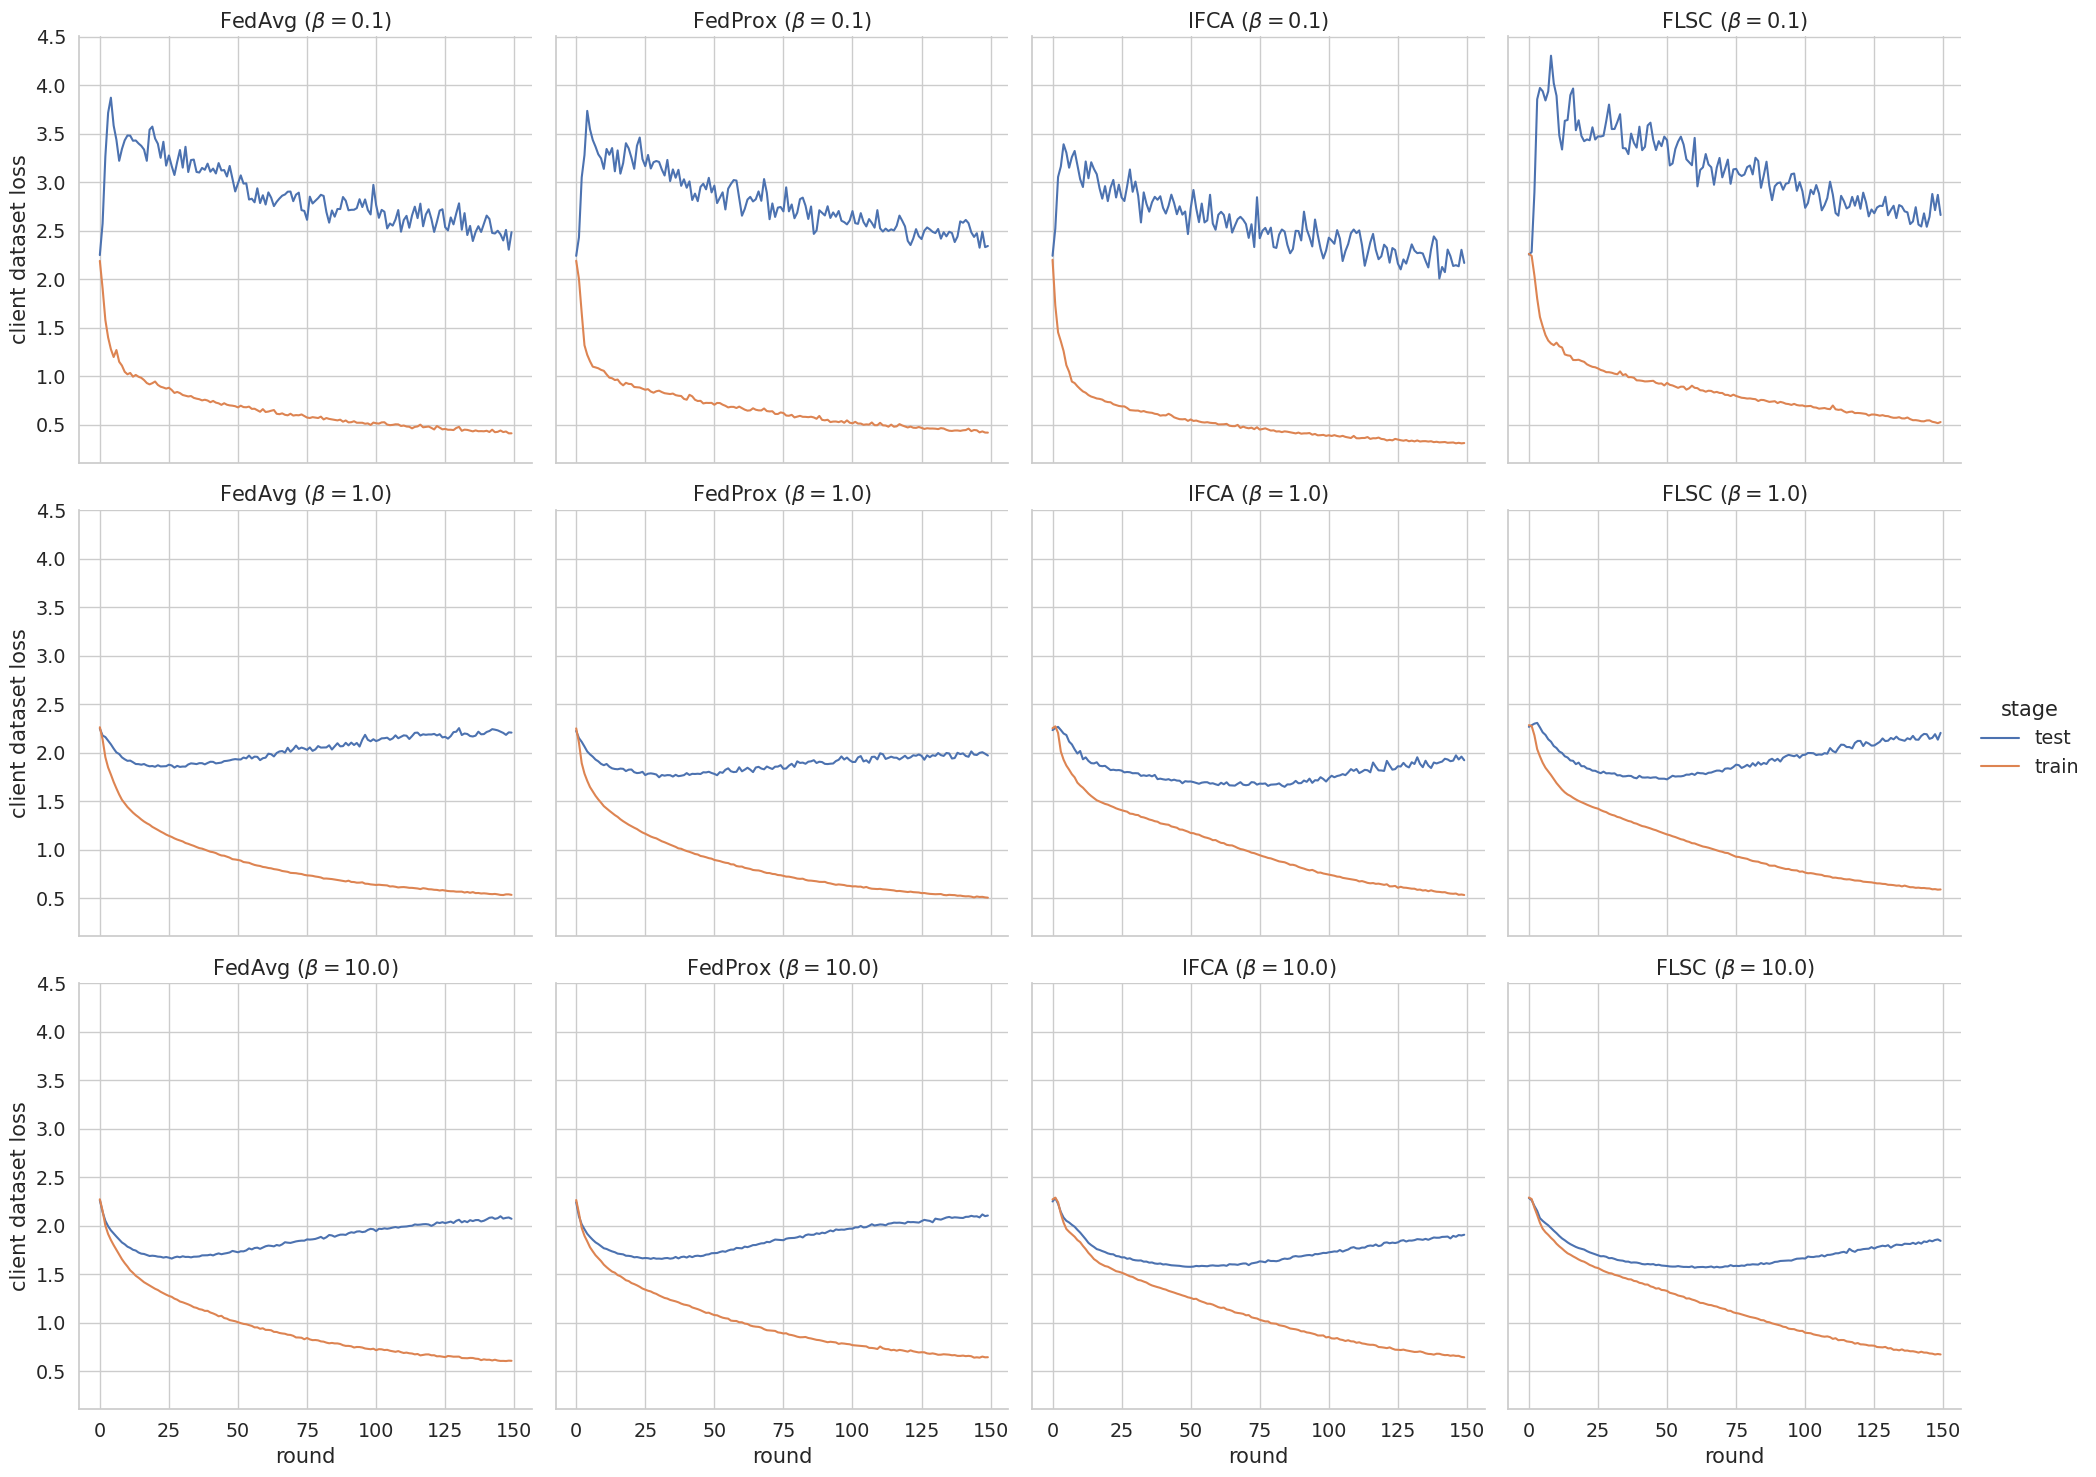

In [13]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_quantity_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


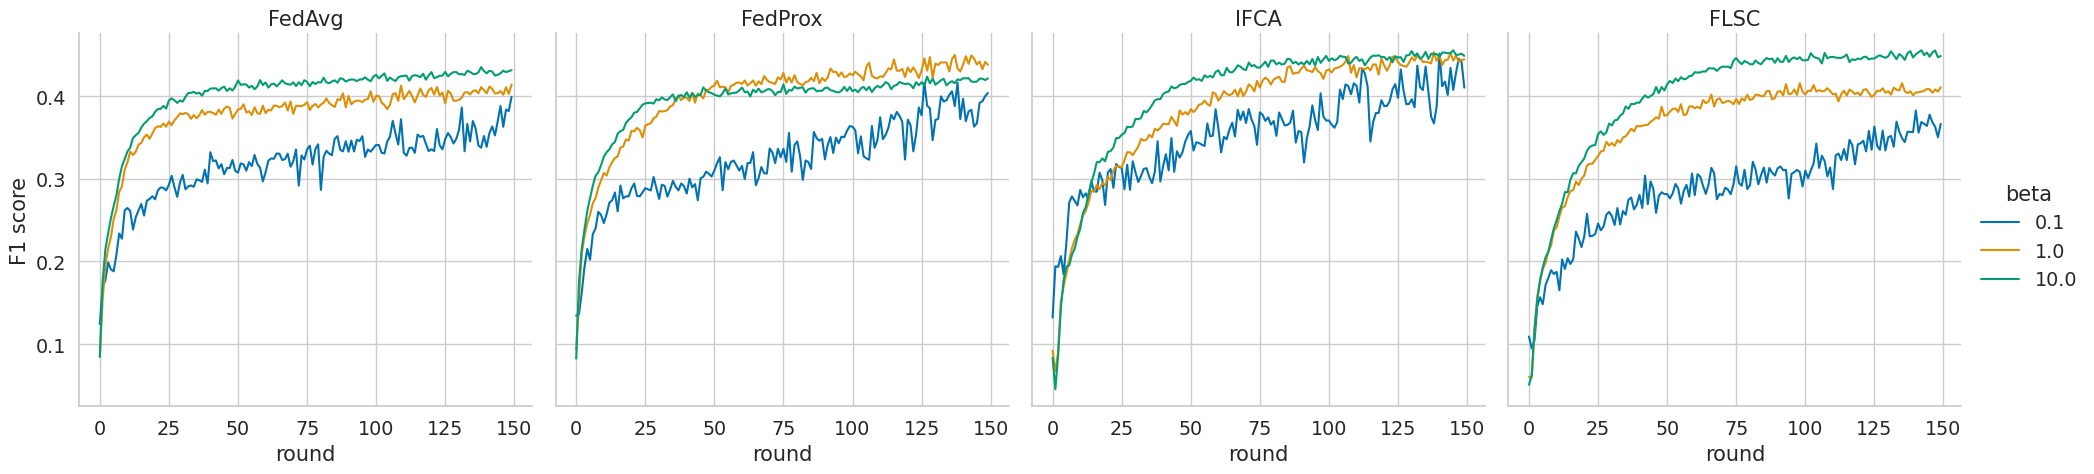

In [14]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_quantity_imbalance.png"))

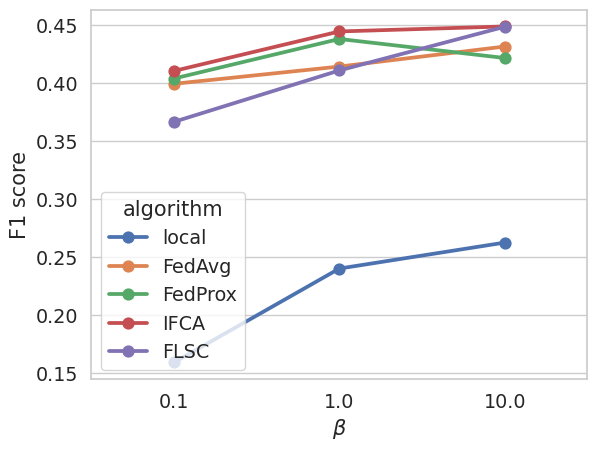

In [15]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_quantity_imbalance.png"))

In [16]:
conn.close()

### MNIST

In [17]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

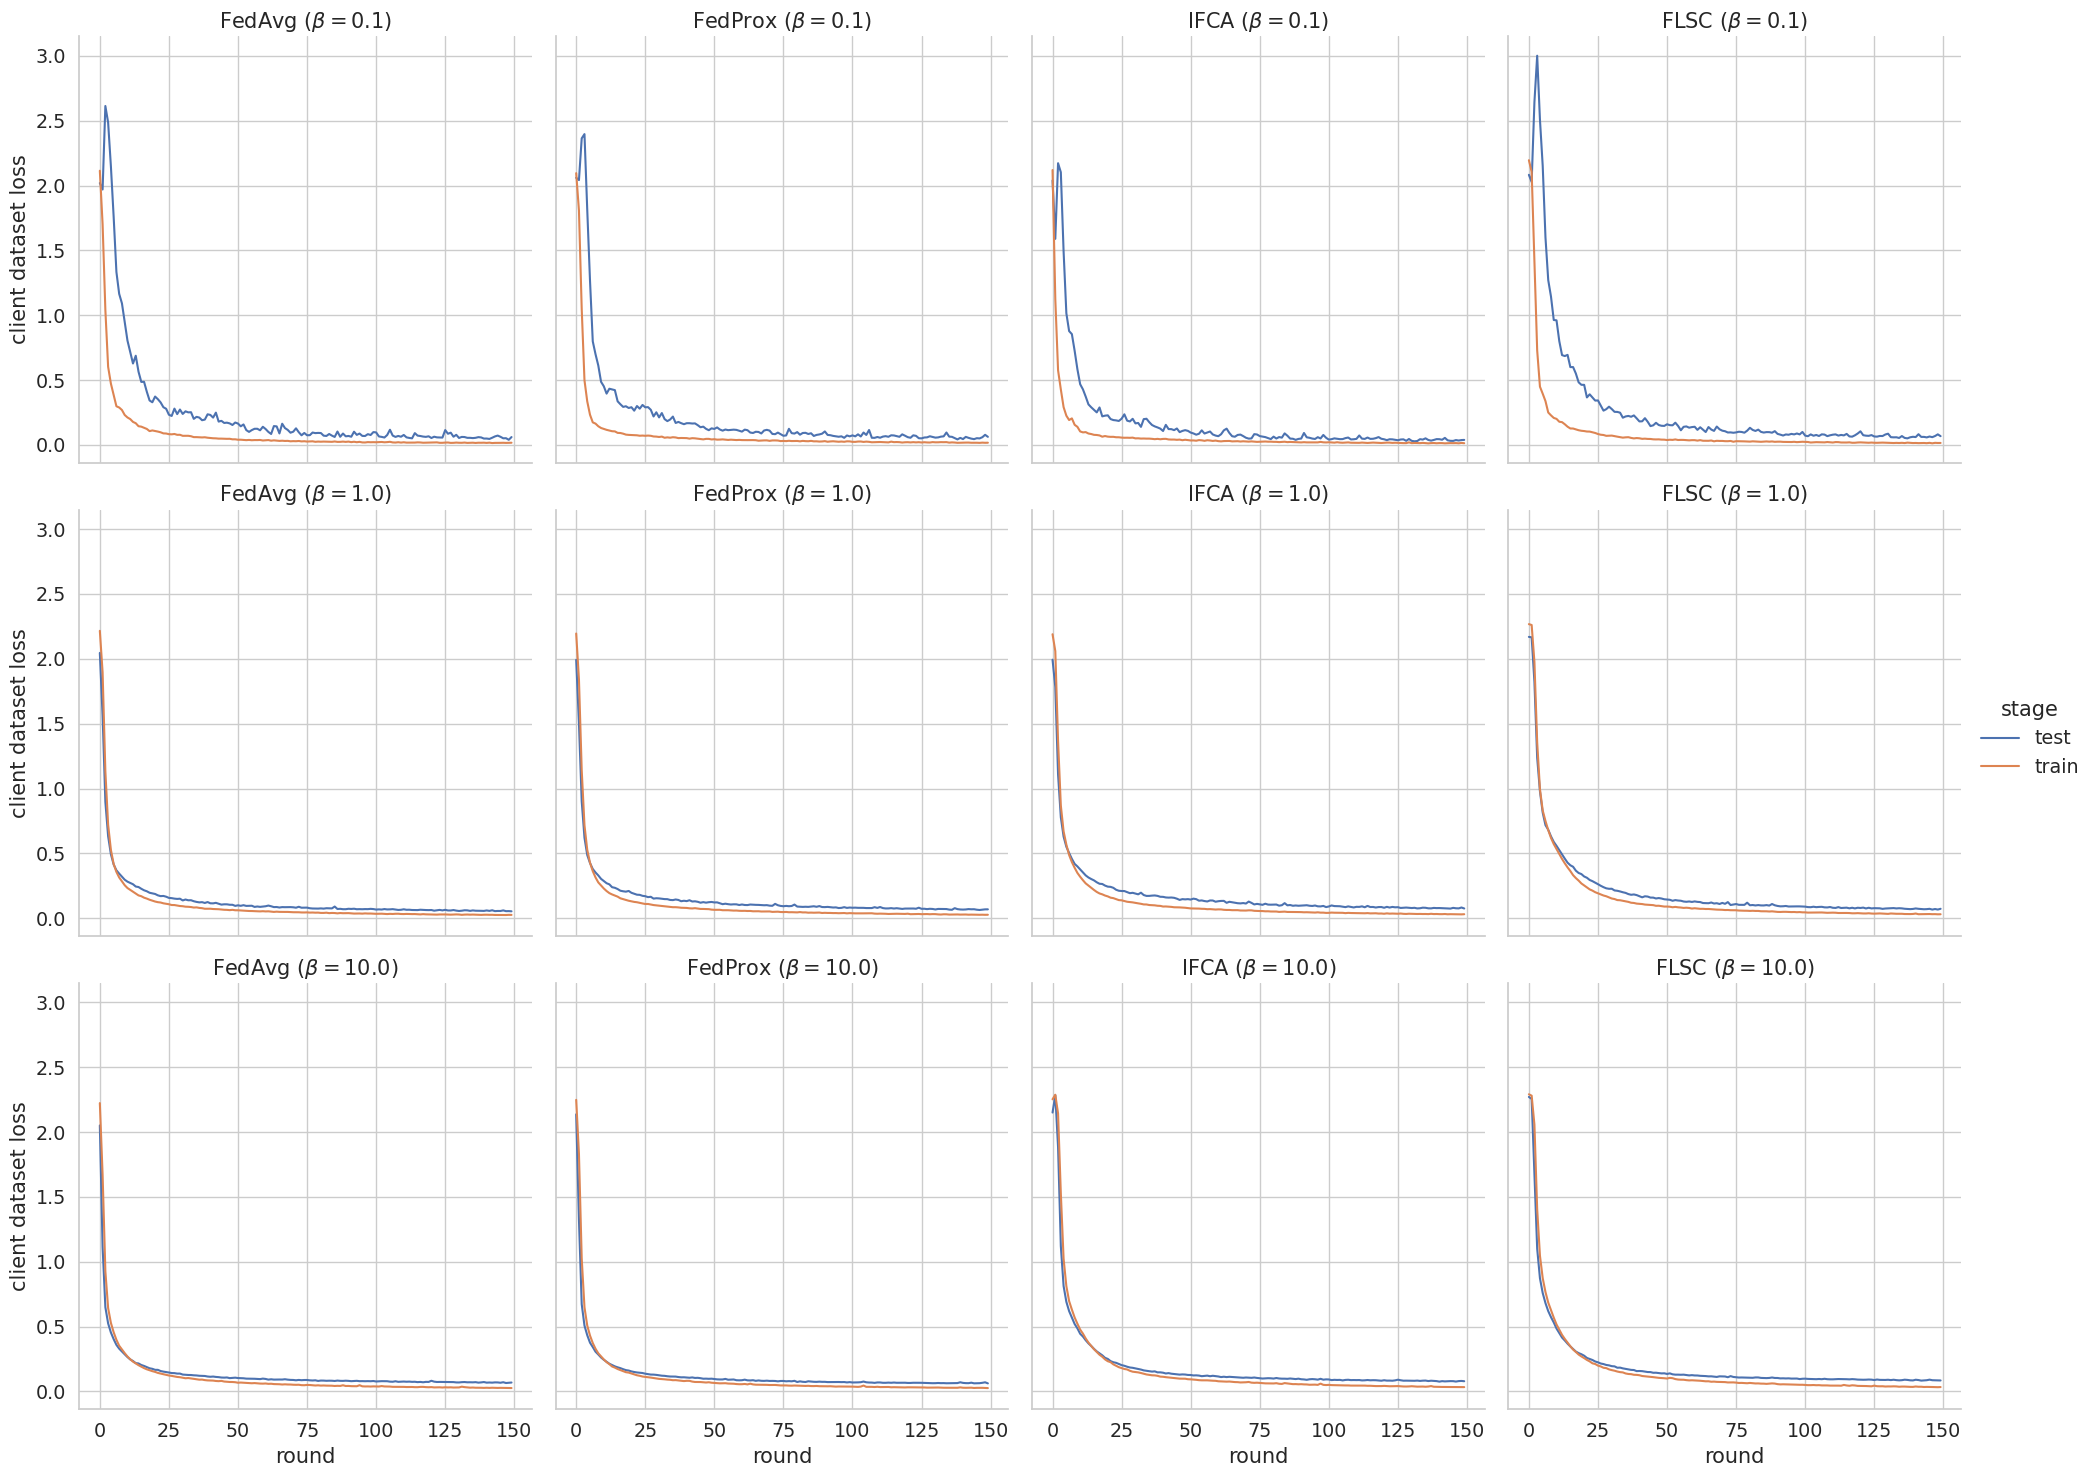

In [18]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_quantity_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


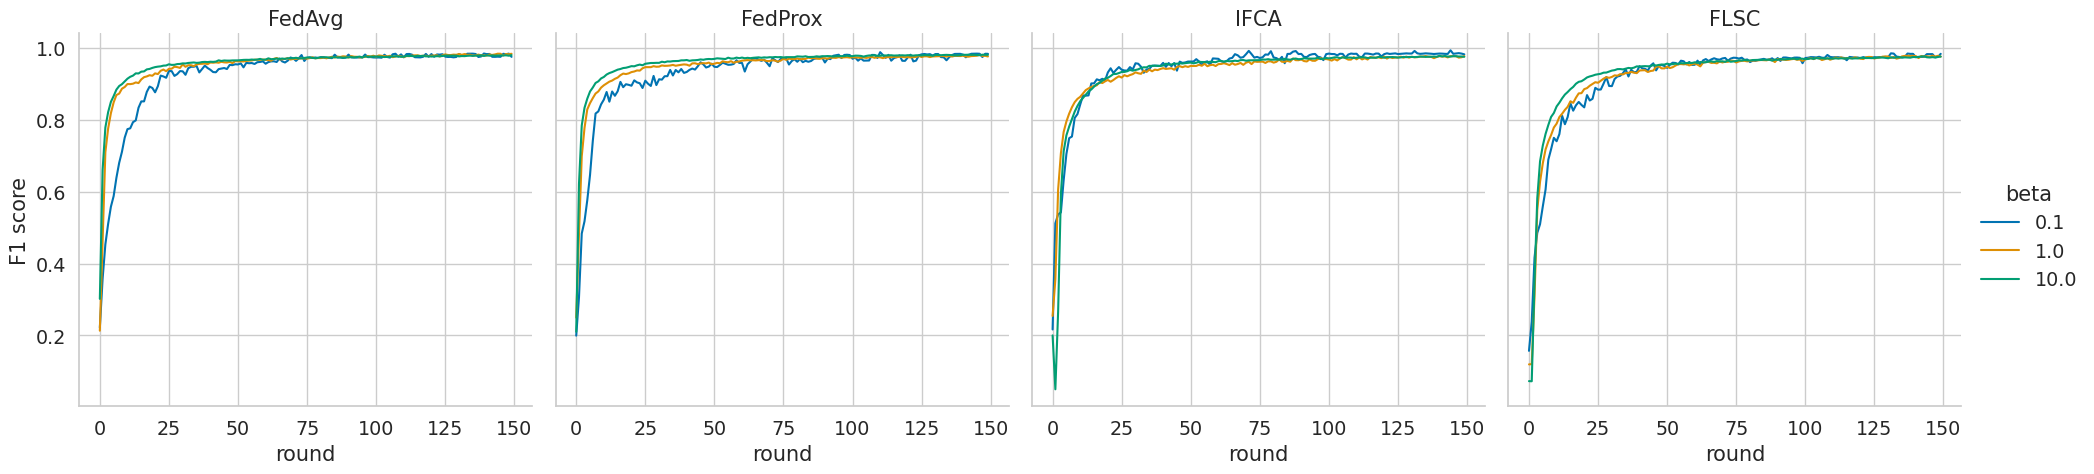

In [19]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_quantity_imbalance.png"))

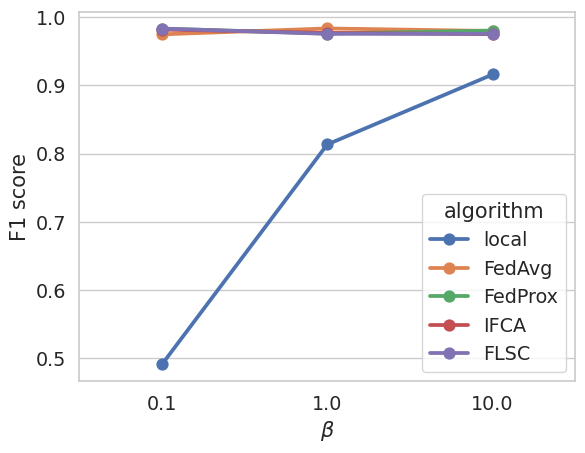

In [20]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_quantity_imbalance.png"))

In [21]:
conn.close()

## Label (Distribution) Imbalance

### CIFAR-10

In [22]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

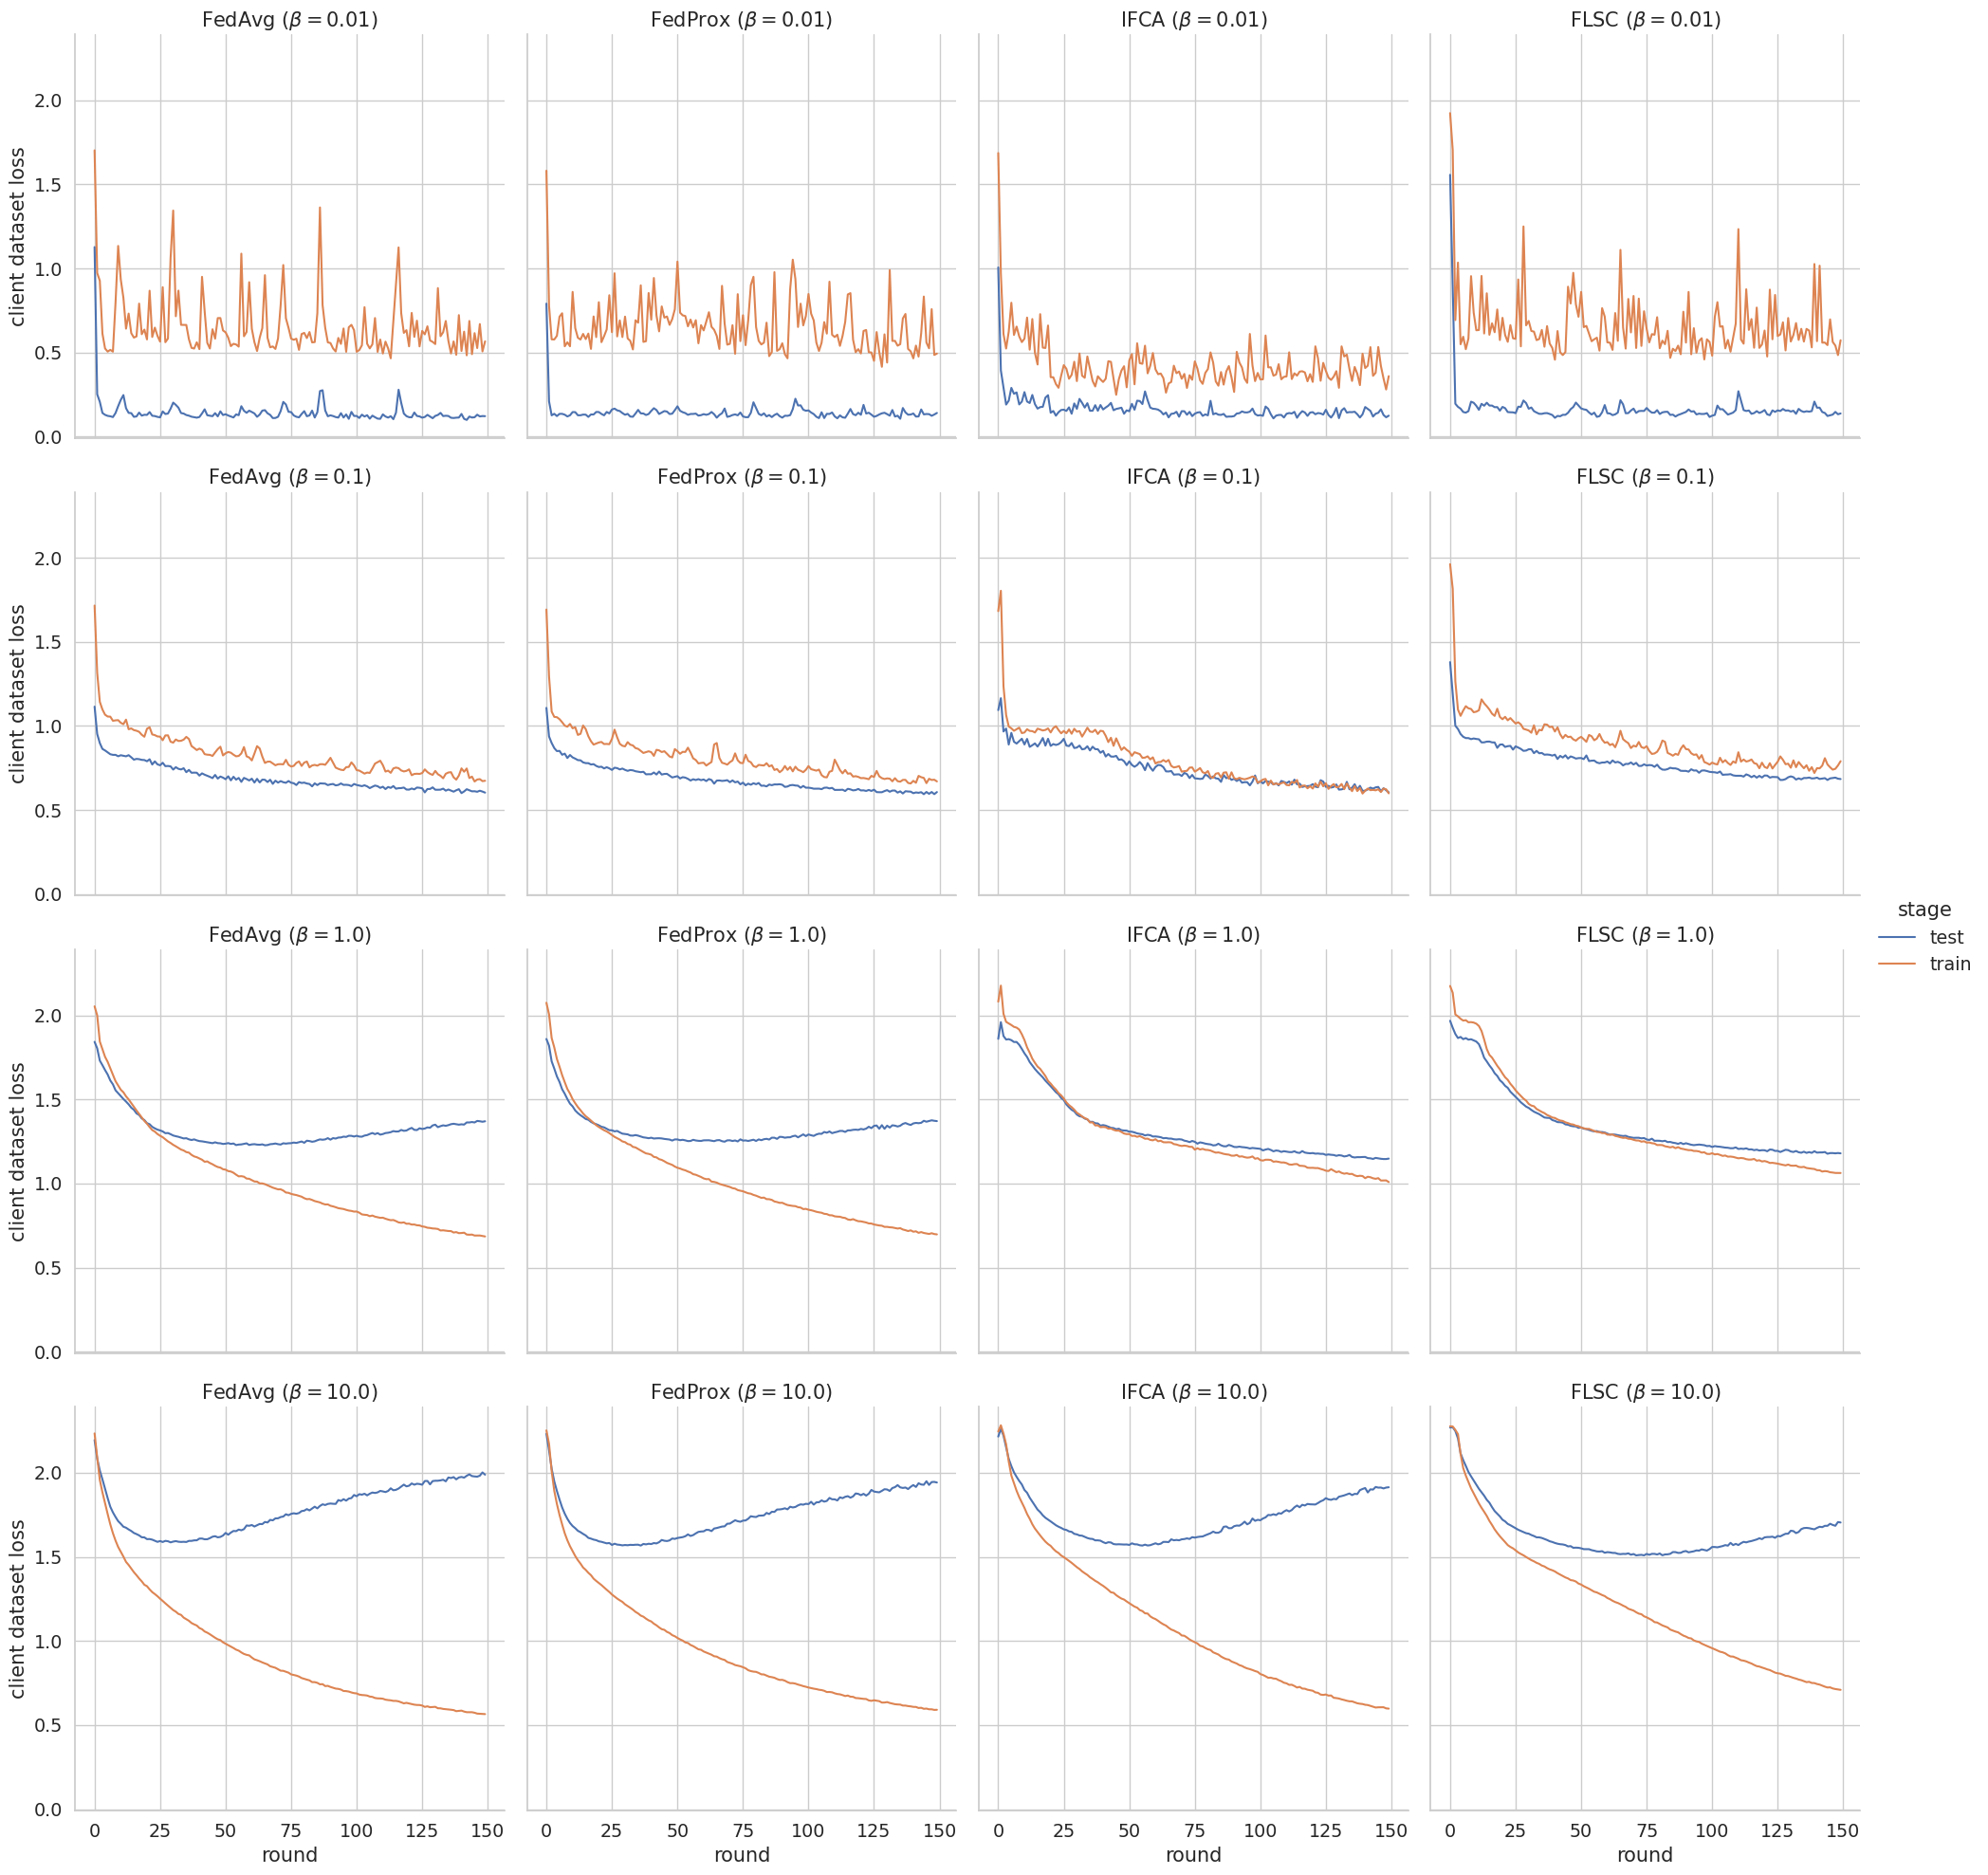

In [23]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_label_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


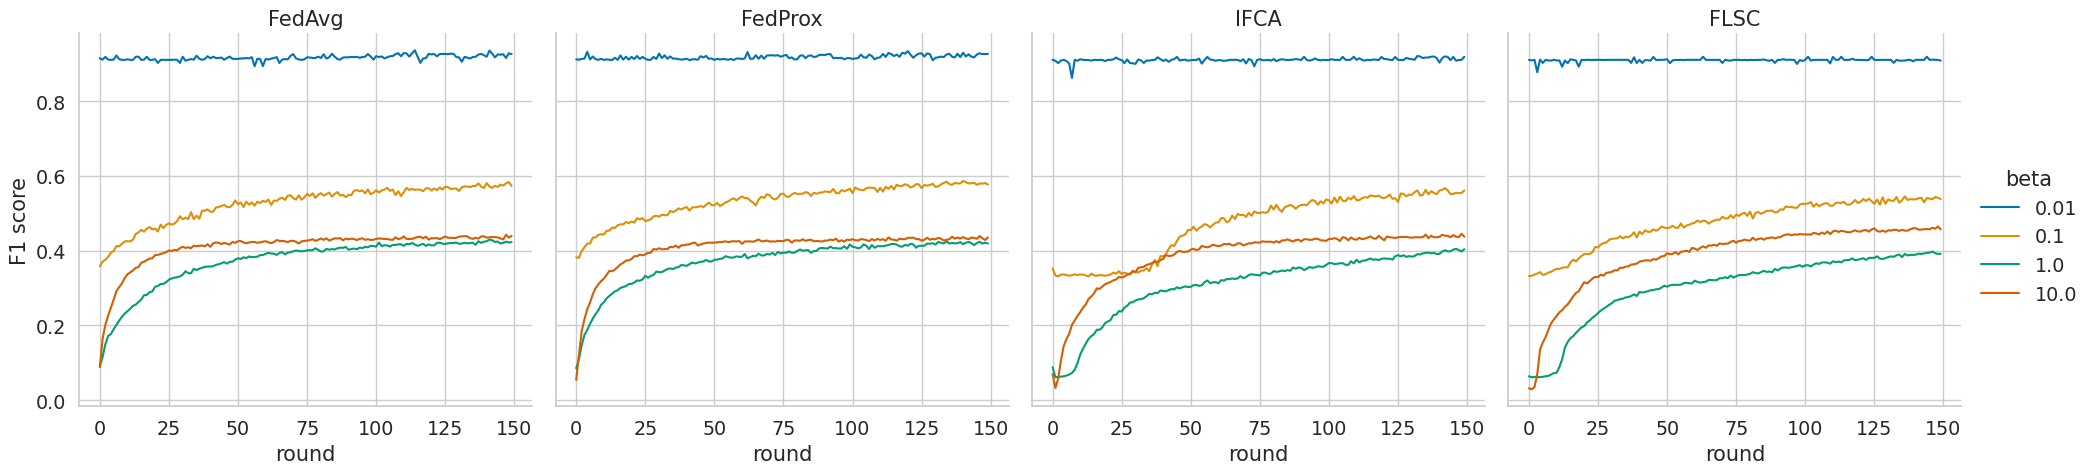

In [24]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_label_distribution_imbalance.png"))

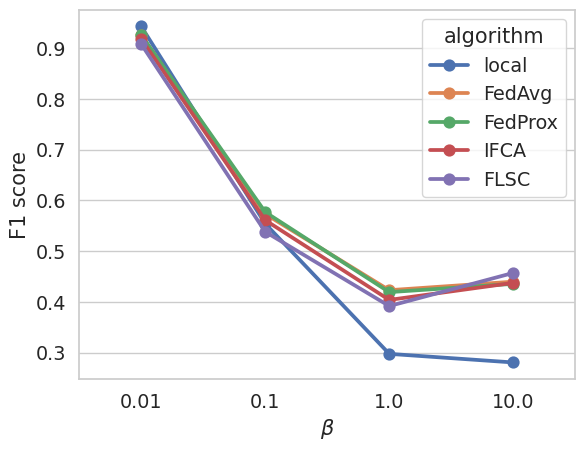

In [25]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_label_distribution_imbalance.png"))

In [26]:
conn.close()

### MNIST

In [27]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

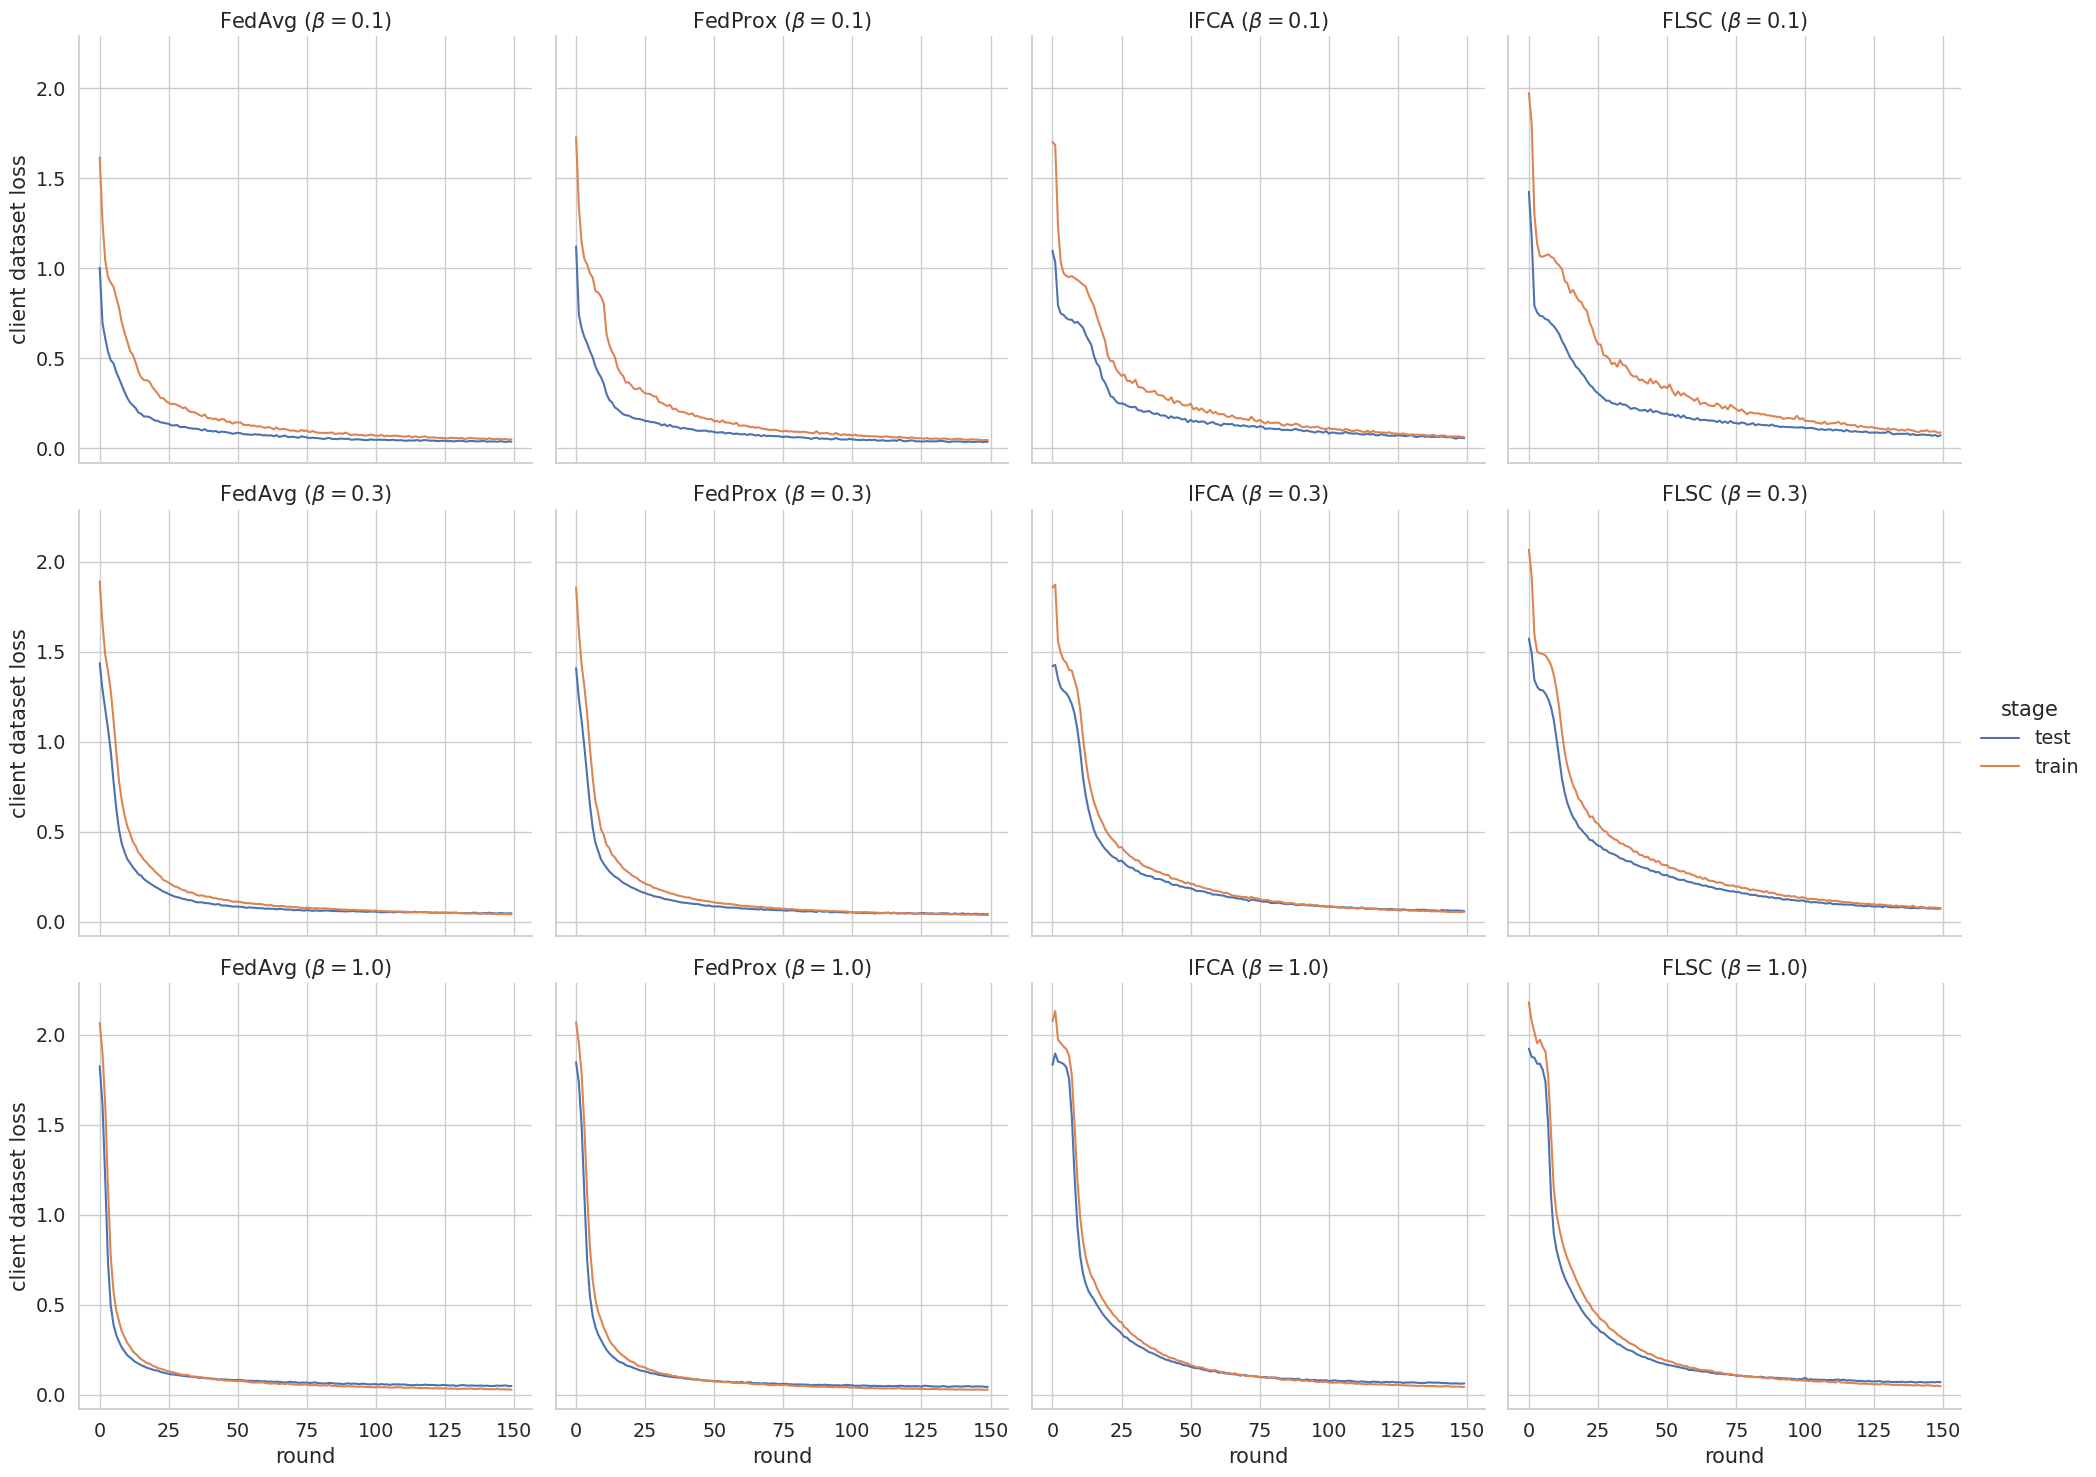

In [28]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_label_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


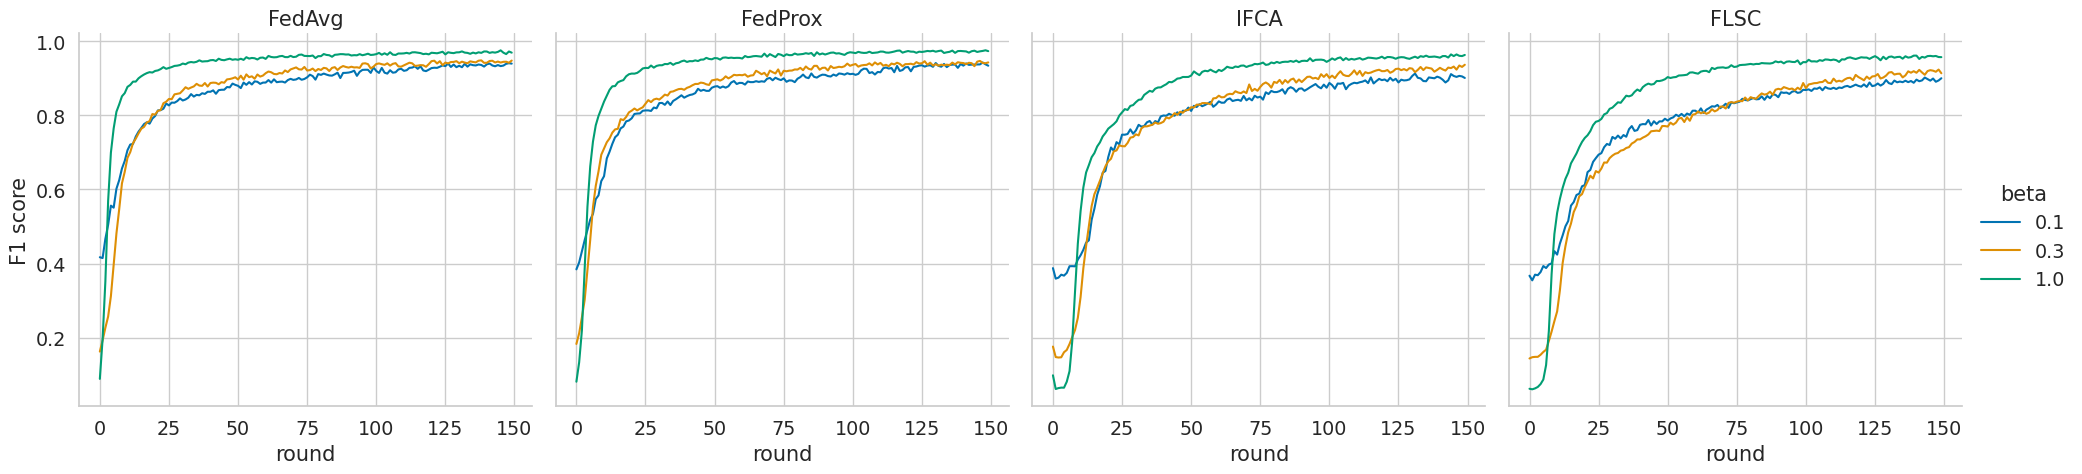

In [29]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_label_distribution_imbalance.png"))

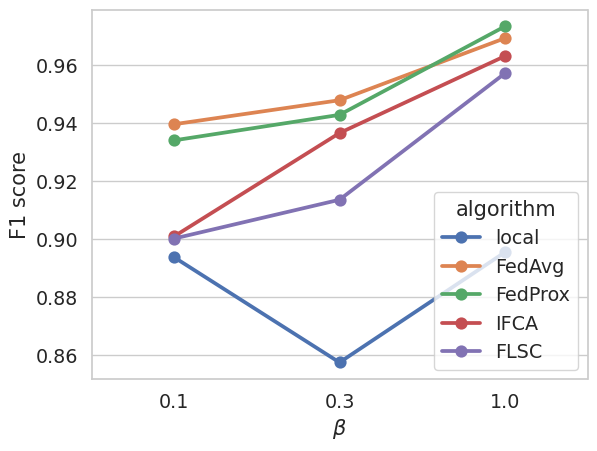

In [30]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_label_distribution_imbalance.png"))

In [31]:
conn.close()

## Feature (Distribution) Imbalance

### CIFAR-10

In [32]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

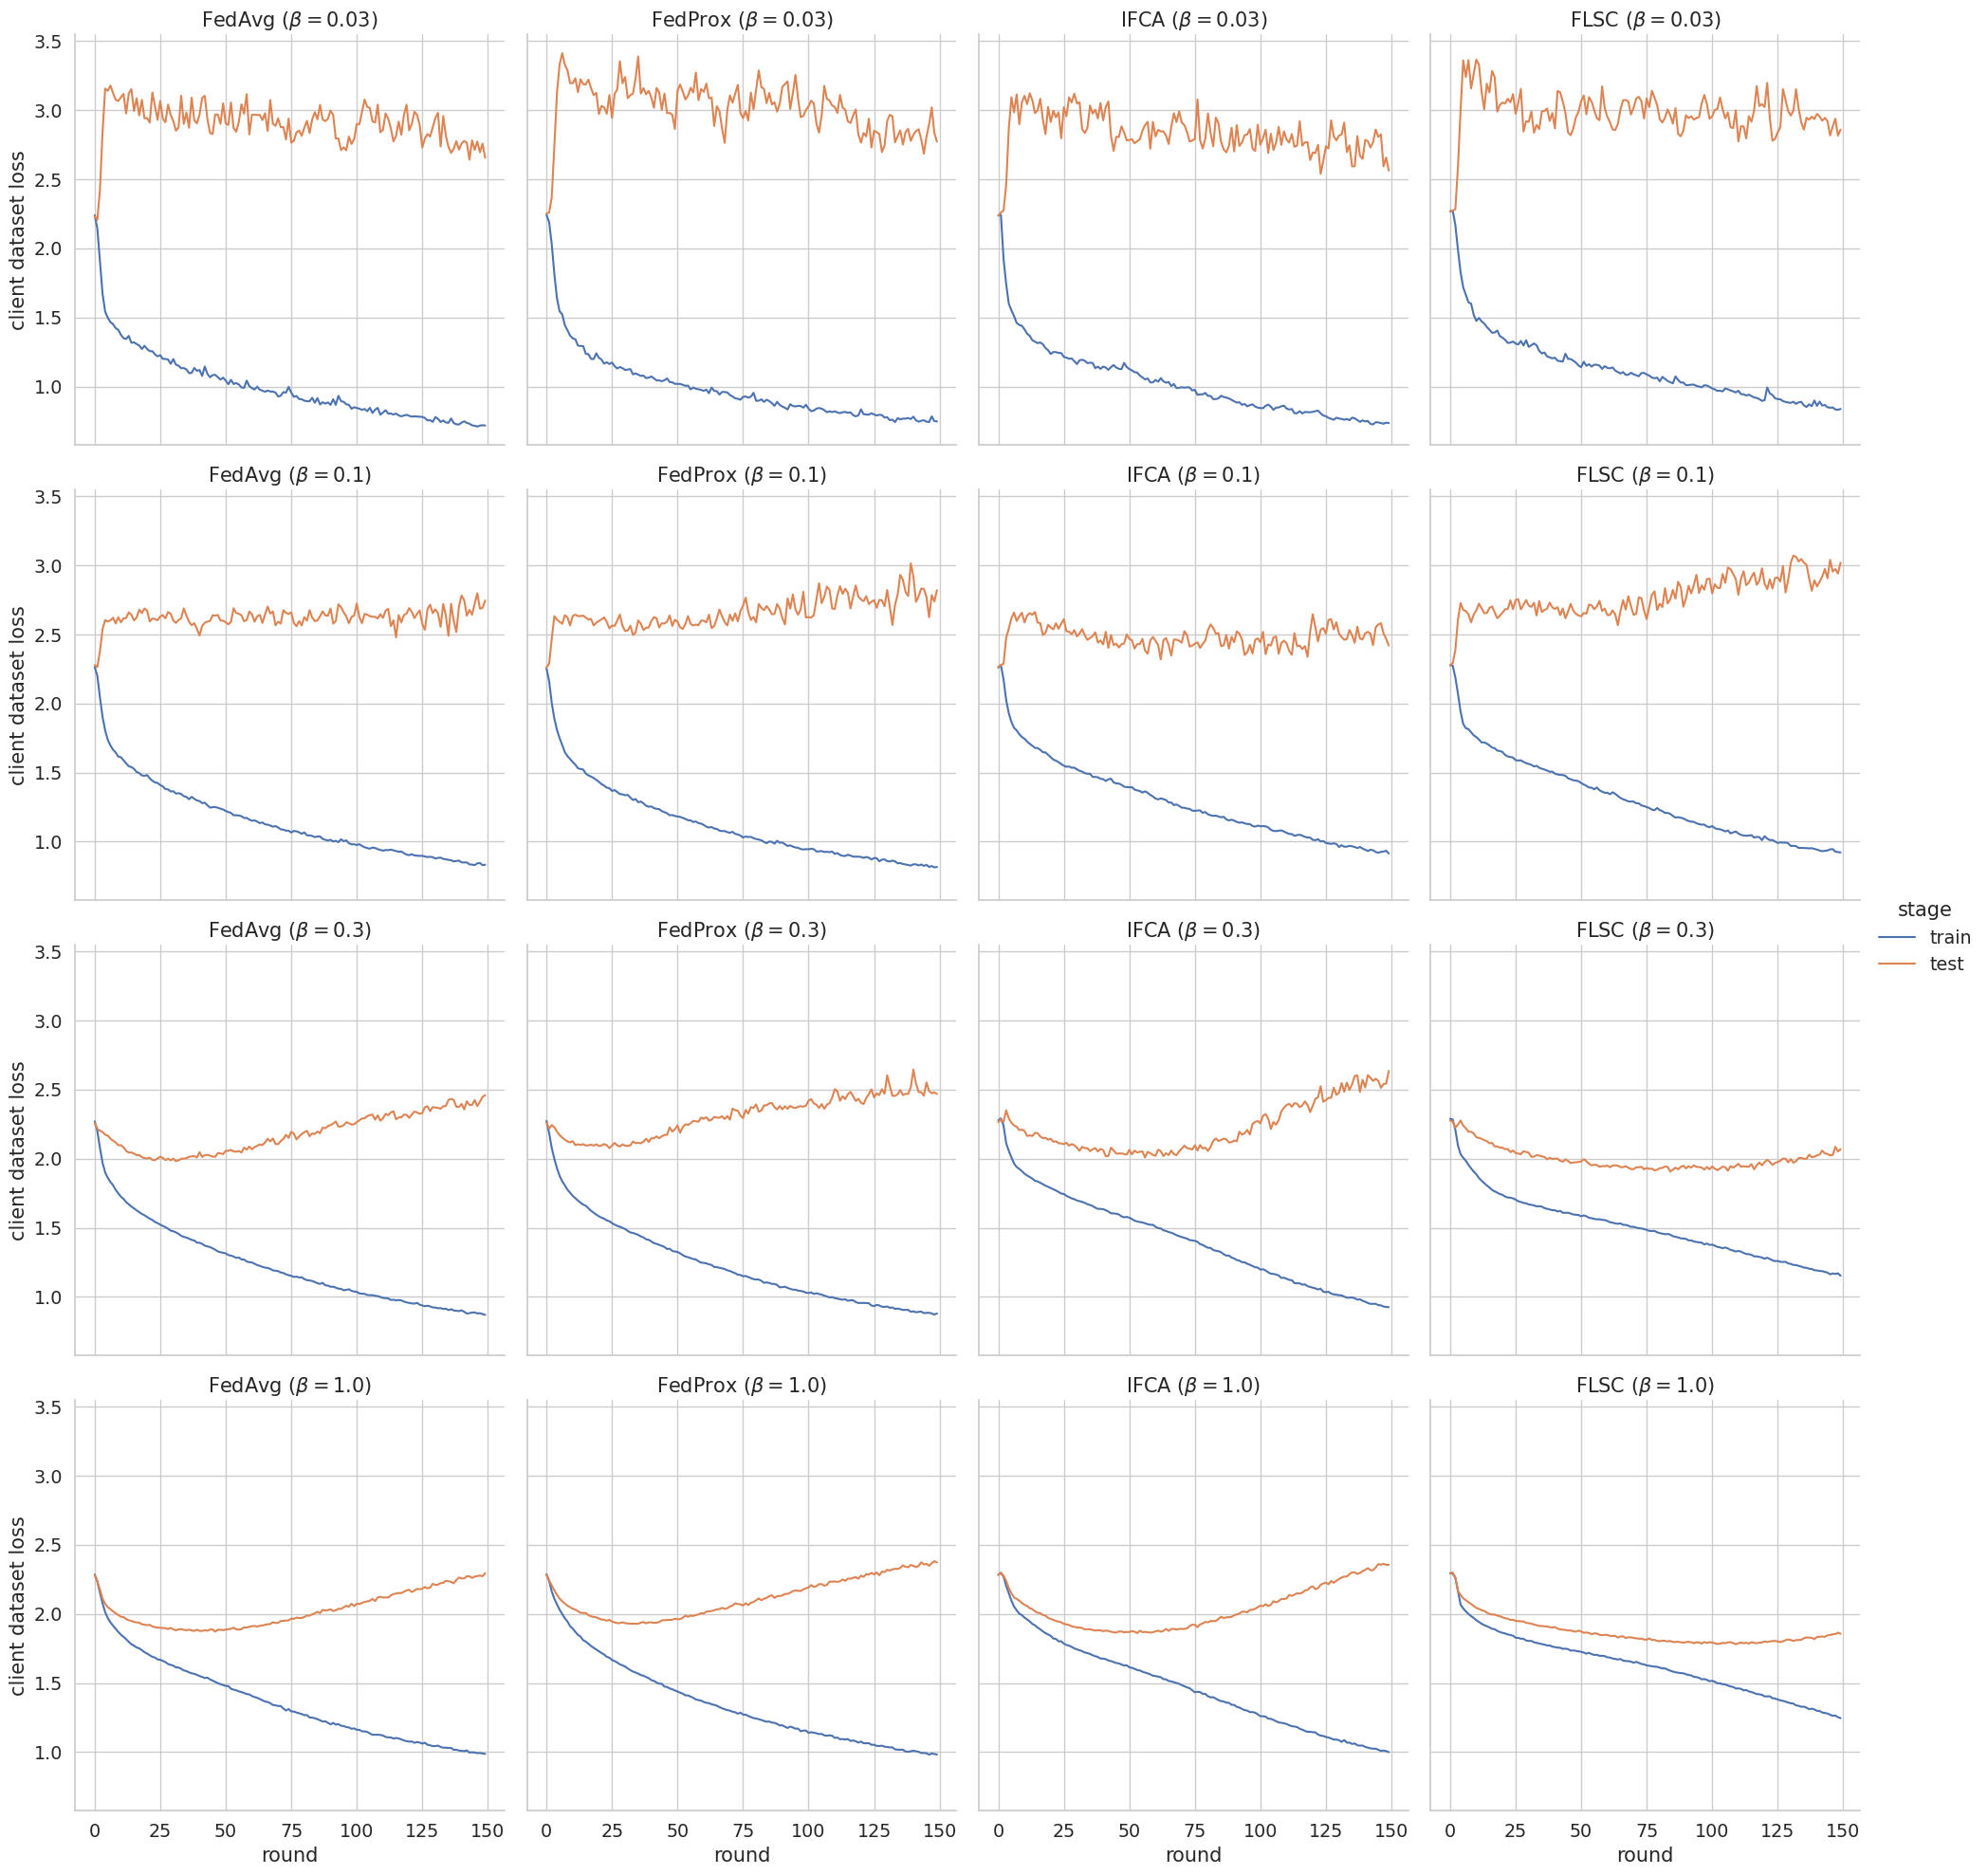

In [33]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_feature_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


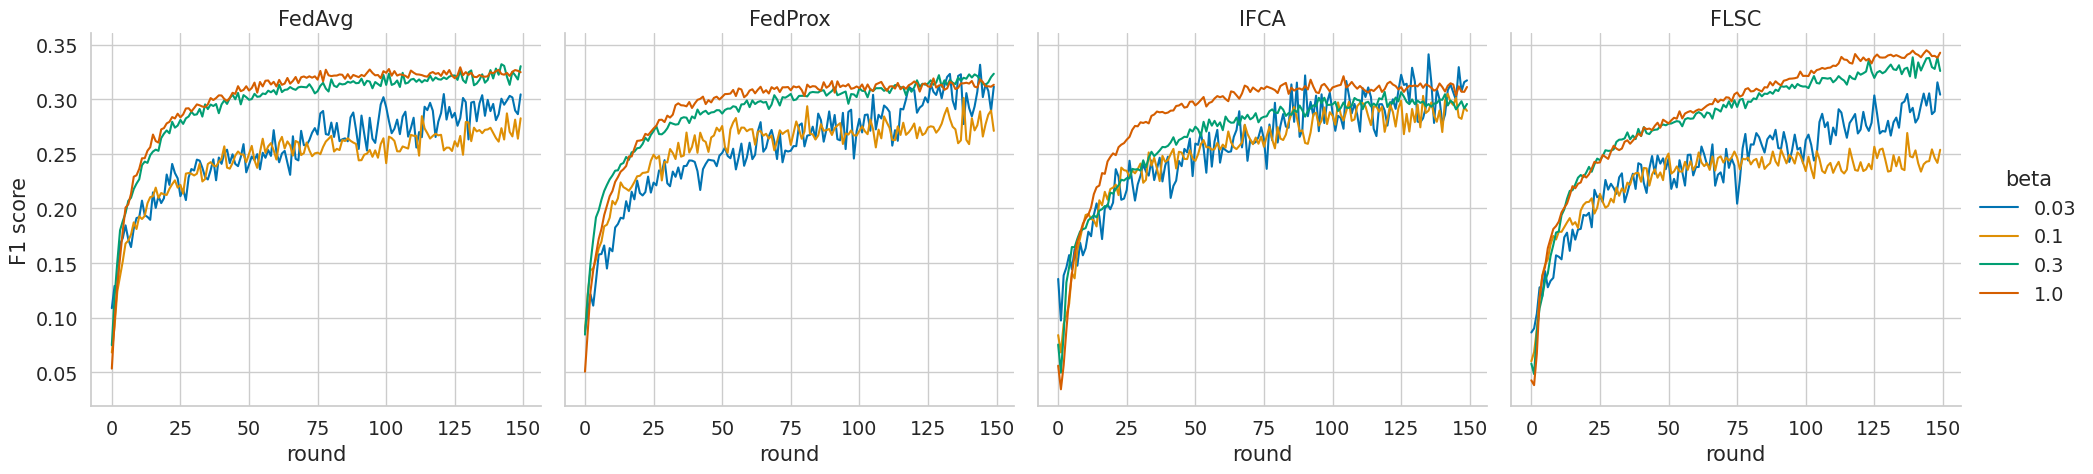

In [34]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_feature_distribution_imbalance.png"))

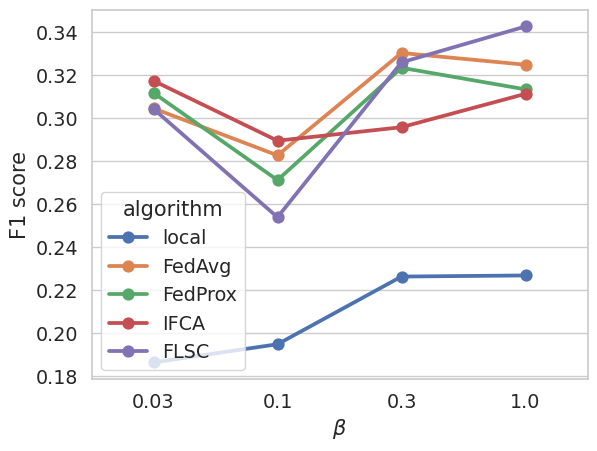

In [35]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_feature_distribution_imbalance.png"))

In [36]:
conn.close()

### MNIST

In [37]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

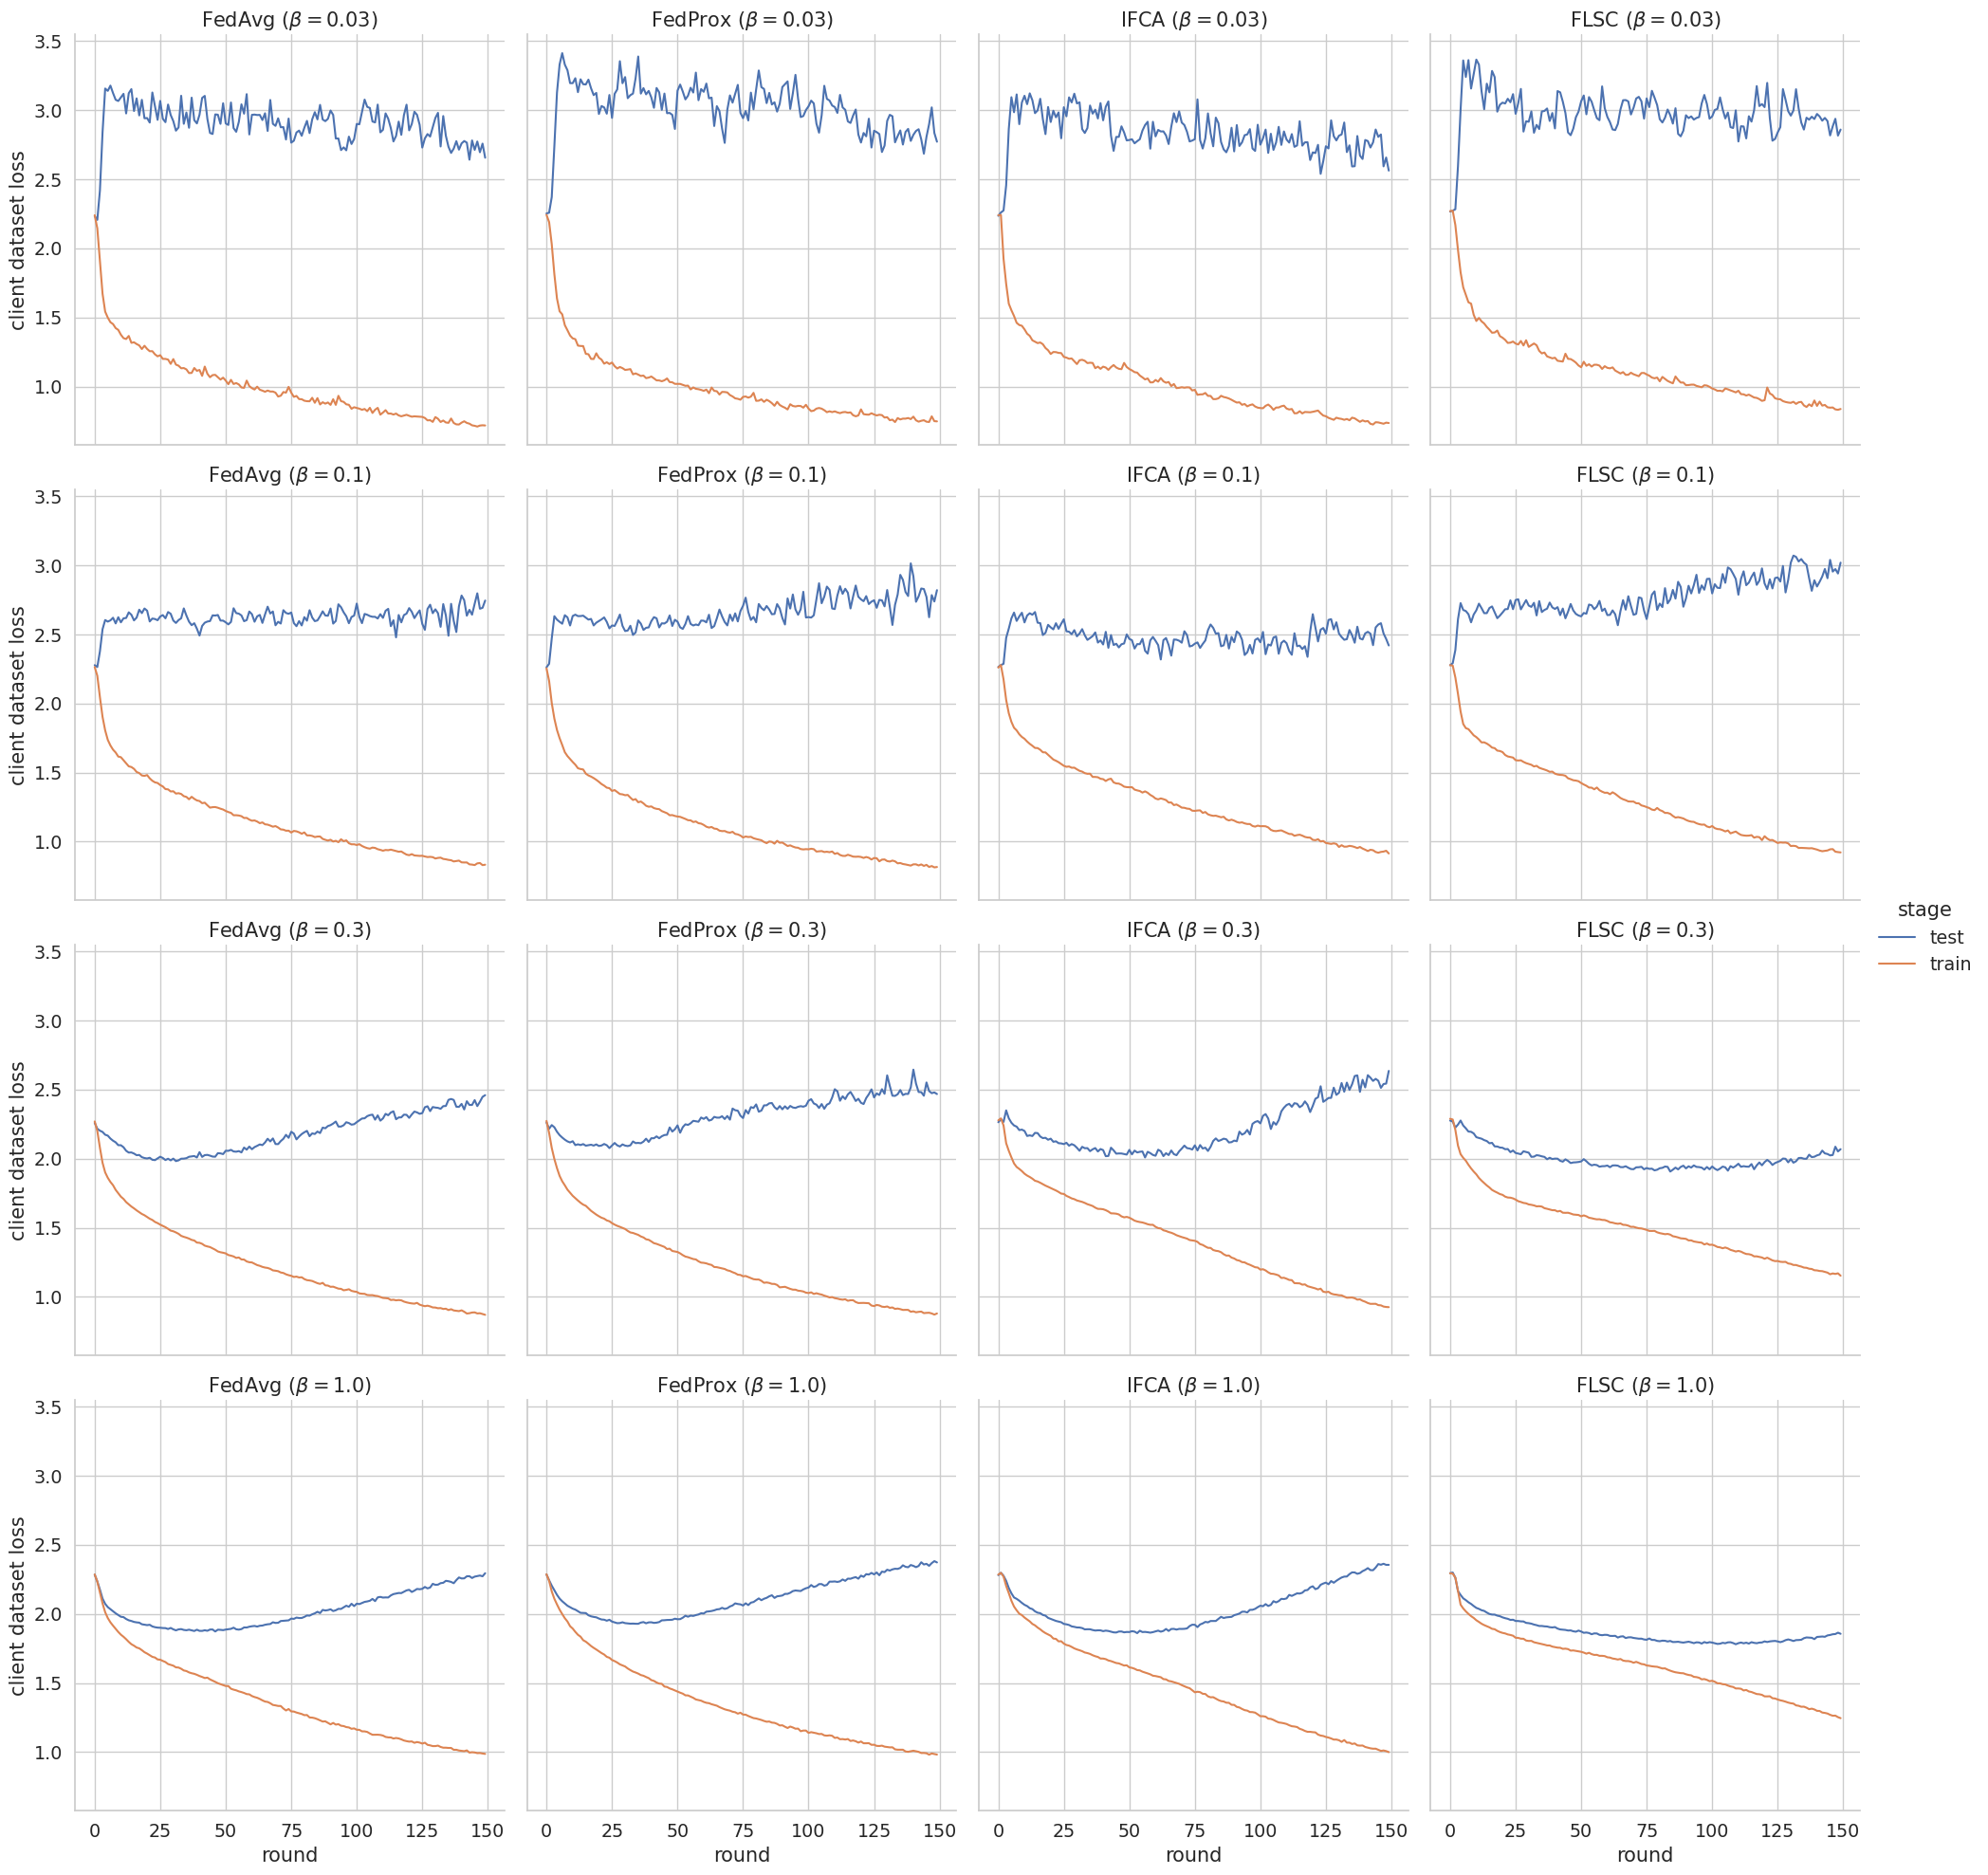

In [38]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_feature_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


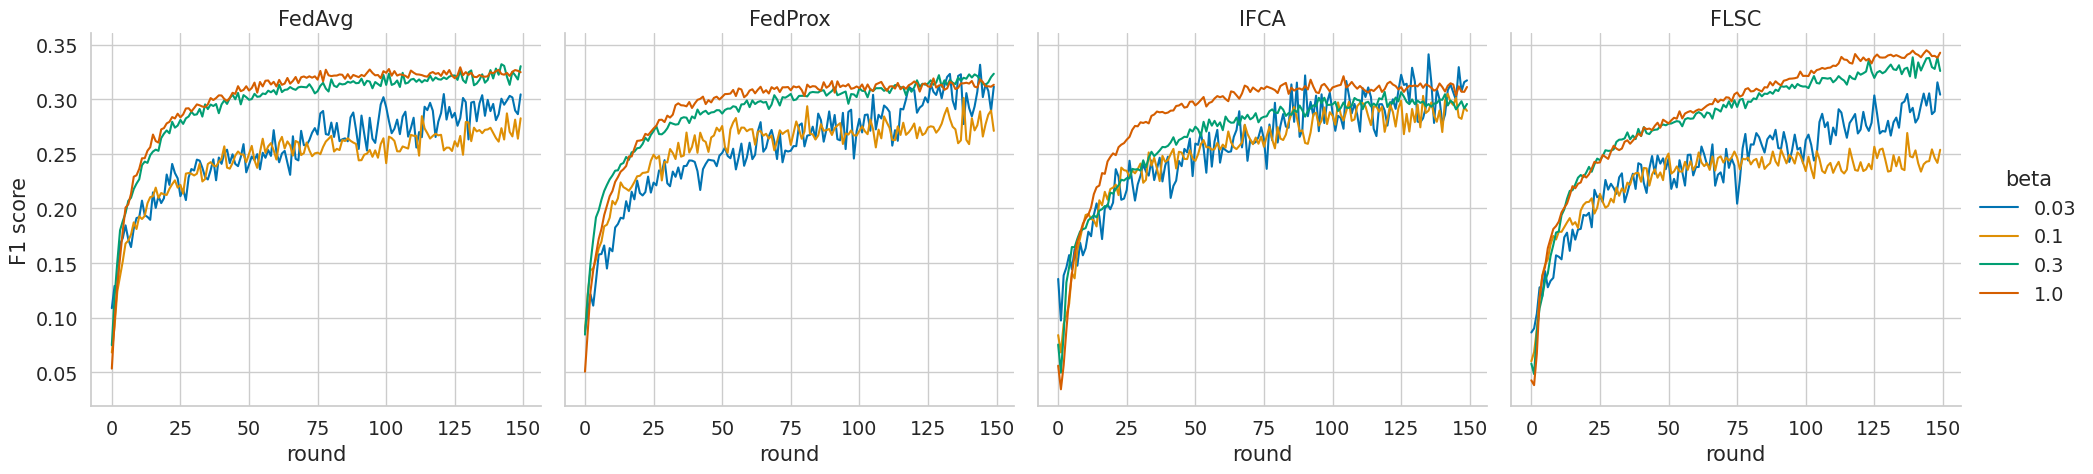

In [39]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_feature_distribution_imbalance.png"))

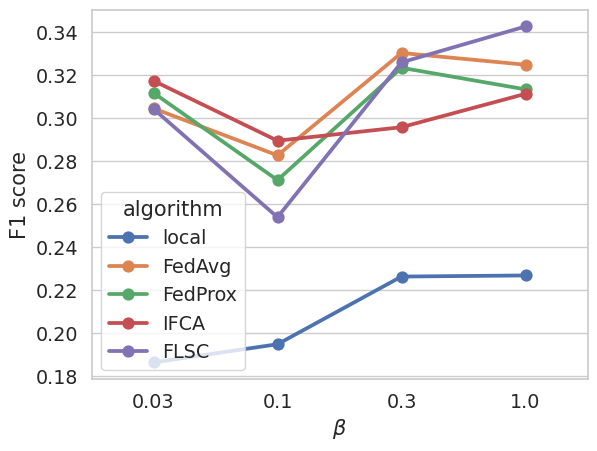

In [40]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_feature_distribution_imbalance.png"))

In [41]:
conn.close()

# Client Benefit

## Quantity Imbalance

### CIFAR-10

In [42]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

In [43]:
benefits = compute_client_benefit(conn, data)

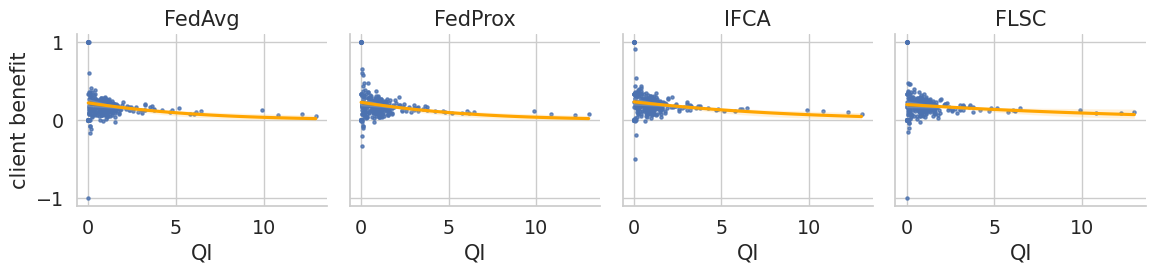

In [44]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10.png"))

In [45]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/quantity")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0    FedAvg   0.164580  1.783513e-27     -0.027555  0.000021  0.046815
1      FLSC   0.178076  1.658573e-35     -0.009353  0.111906  0.004270
2      IFCA   0.192745  2.808048e-38     -0.019678  0.001251  0.025996
3   FedProx   0.171361  1.068080e-30     -0.026978  0.000018  0.047594

In [46]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/quantity")

algorithm  intercept   beta_LI      p_LI  beta_LDI     p_LDI   adj_Rsq
0    FedAvg   0.172722 -0.006706  0.460874  0.381679  0.000003  0.054223
1      FLSC   0.182824 -0.002194  0.794127  0.106609  0.152140  0.000170
2      IFCA   0.197387 -0.002344  0.787086  0.231060  0.002764  0.019456
3   FedProx   0.176101 -0.003349  0.706038  0.337074  0.000022  0.044068

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Mas

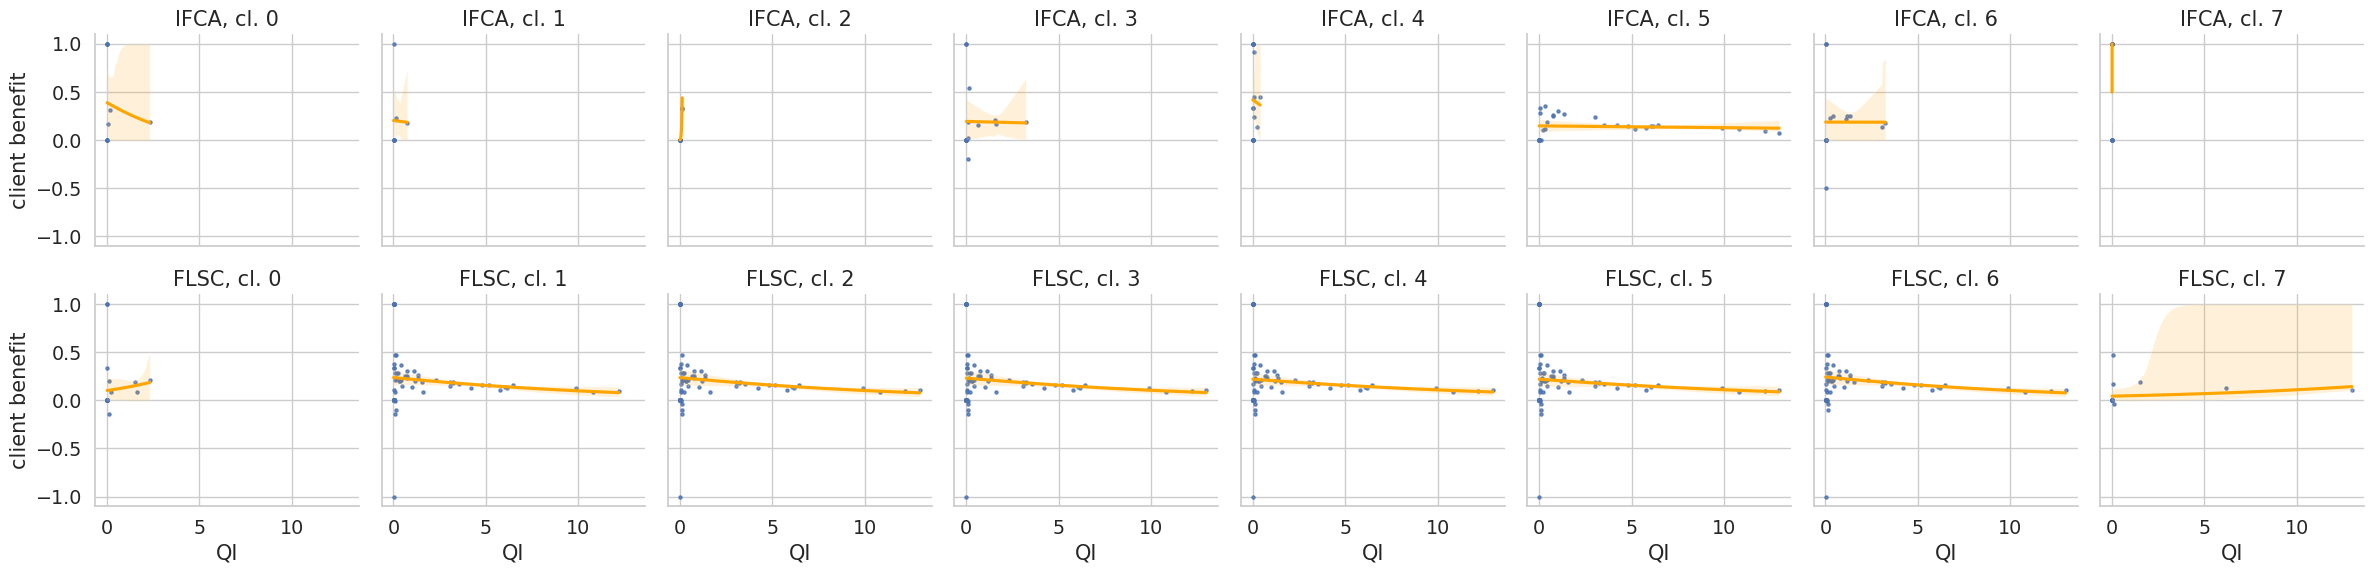

In [47]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance', imbalance_value=0.1).savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters.png"))

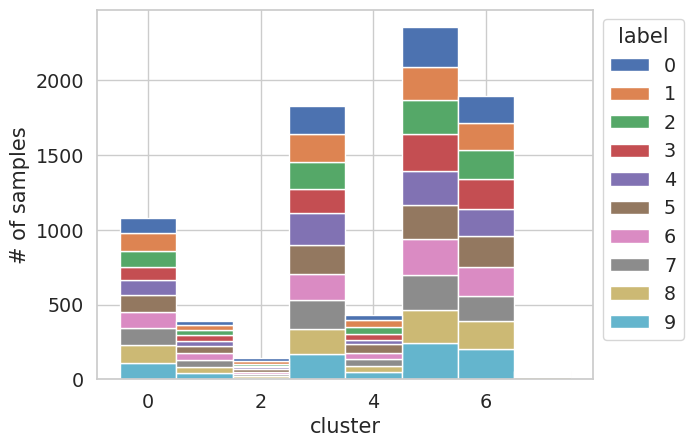

In [48]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters_histogram.png"))

In [49]:
benefits.explode('client_labels').client_labels.unique()

array([9, 3, 5, 6, 4, 2, 7, 1, 8, 0], dtype=object)

### MNIST

In [50]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

In [51]:
benefits = compute_client_benefit(conn, data)

<Axes: title={'center': 'Quantity vs. label imbalance'}, xlabel='QI', ylabel='LI'>

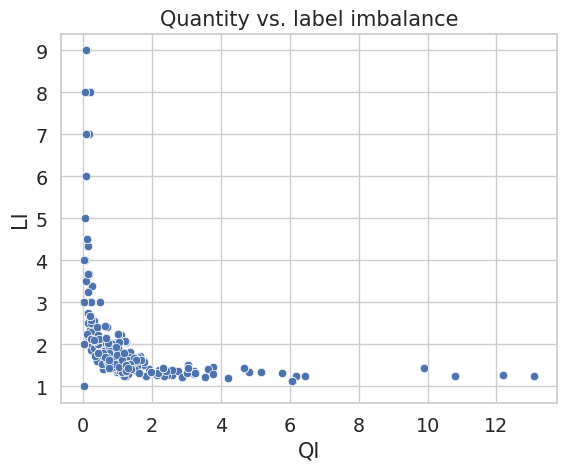

In [52]:
fig = sns.scatterplot(data=benefits, x='quantity_imbalance', y='label_imbalance')
fig.set(xlabel='QI', ylabel='LI', title='Quantity vs. label imbalance')
fig.get_figure().savefig(os.path.join(OUTPUT_DIR, "quantity_vs_label_imbalance_quantity_skew_mnist.png"))
fig

<Axes: title={'center': 'Quantity vs. label distribution imbalance'}, xlabel='QI', ylabel='LI'>

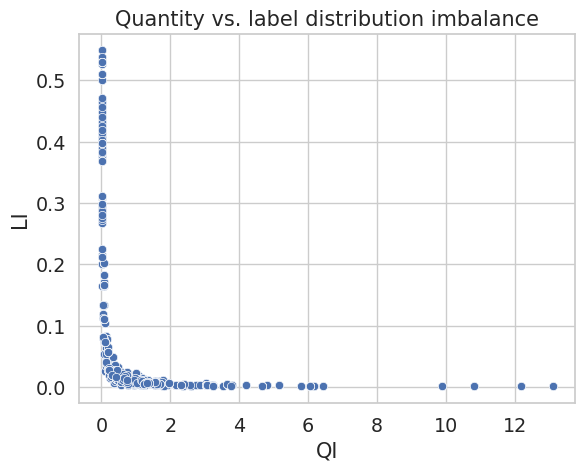

In [53]:
fig = sns.scatterplot(data=benefits, x='quantity_imbalance', y='label_distribution_imbalance')
fig.set(xlabel='QI', ylabel='LI', title='Quantity vs. label distribution imbalance')
fig.get_figure().savefig(os.path.join(OUTPUT_DIR, "quantity_vs_label_distribution_imbalance_quantity_skew_mnist.png"))
fig

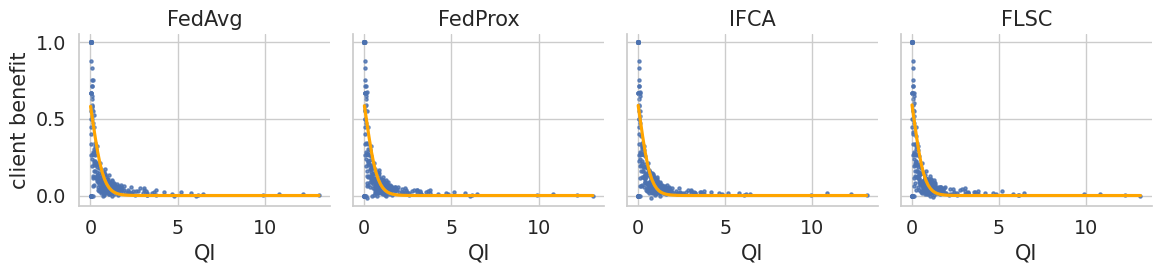

In [54]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist.png"))

In [55]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/quantity")

algorithm  intercept   p_intercept  beta_log(QI)          p_QI   adj_Rsq
0   FedProx   0.086011  1.504283e-10     -0.136760  7.900825e-75  0.607069
1      FLSC   0.083422  4.313104e-10     -0.137530  1.107851e-75  0.611350
2      IFCA   0.083532  4.439125e-10     -0.137246  2.746418e-75  0.609378
3    FedAvg   0.087978  9.190163e-11     -0.134539  2.509831e-72  0.594241

In [56]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/quantity")

algorithm  intercept   beta_LI      p_LI  beta_LDI         p_LDI   adj_Rsq
0   FedProx   0.047068  0.025686  0.016934  1.587633  7.451131e-51  0.482745
1      FLSC   0.046181  0.025000  0.020248  1.593977  4.773266e-51  0.483551
2      IFCA   0.049498  0.023300  0.030664  1.593212  6.816767e-51  0.481382
3    FedAvg   0.041865  0.029975  0.005820  1.541807  4.108196e-48  0.467094

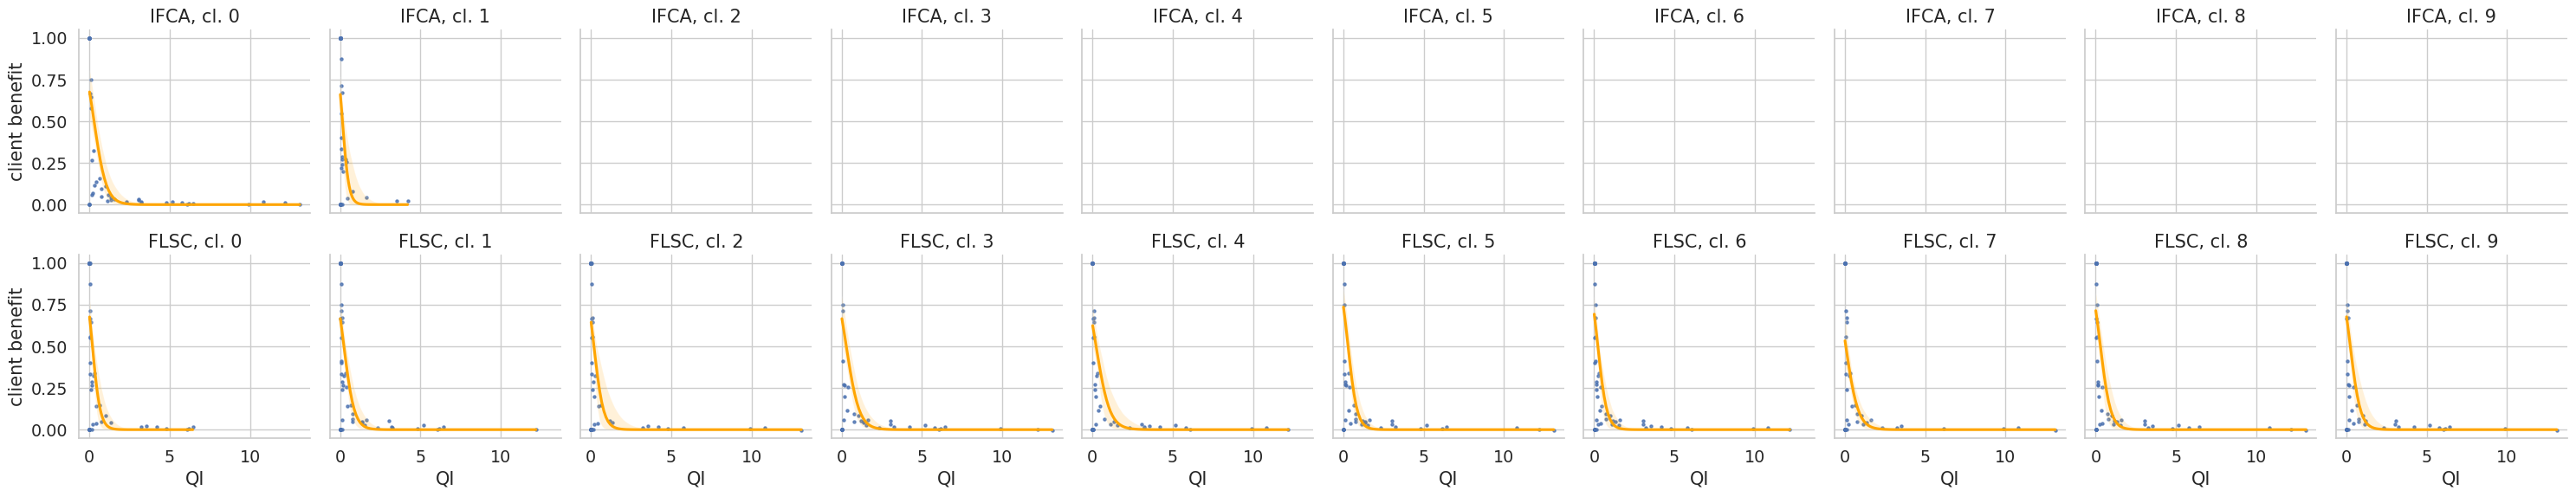

In [57]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters.png"))

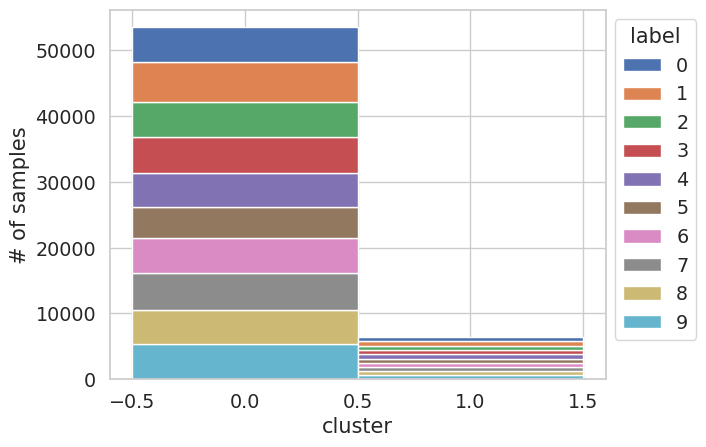

In [58]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters_histogram.png"))

## Label (Distribution) Imbalance

### CIFAR-10

In [59]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [60]:
benefits = compute_client_benefit(conn, data)

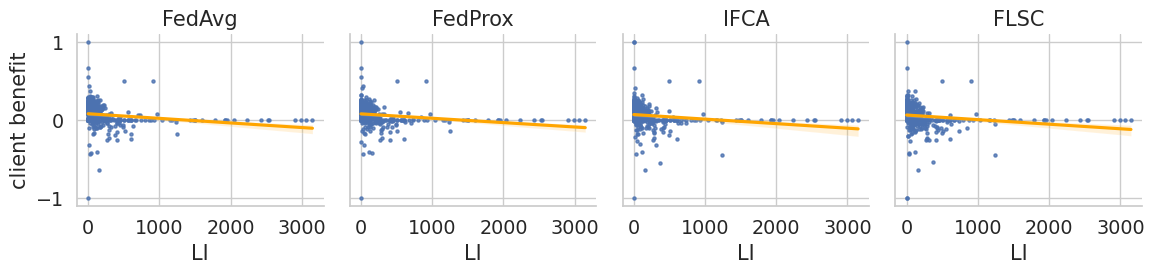

In [61]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10.png"))

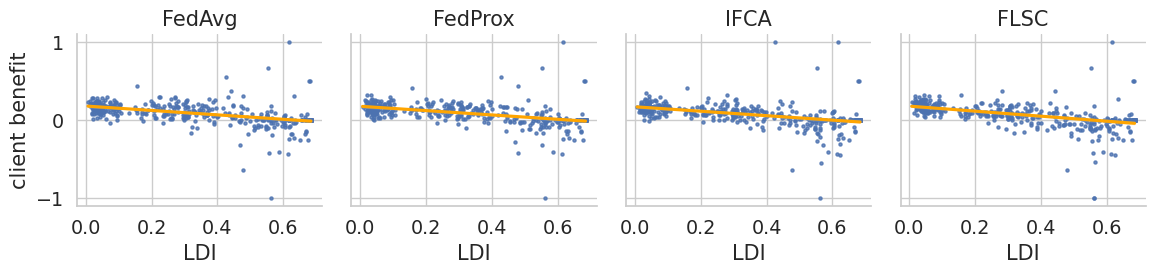

In [62]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10.png"))

In [63]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/label")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0      FLSC   0.066794  1.384236e-17      0.016845  0.000092  0.029495
1    FedAvg   0.082116  7.658757e-29      0.014889  0.000159  0.027388
2   FedProx   0.081593  8.727706e-31      0.015621  0.000035  0.033256
3      IFCA   0.070004  9.896974e-21      0.012295  0.002597  0.016764

In [64]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/label")

algorithm  intercept   beta_LI      p_LI  beta_LDI         p_LDI   adj_Rsq
0      FLSC   0.182047  0.000012  0.411909 -0.329975  5.442334e-32  0.271649
1    FedAvg   0.182879  0.000002  0.900522 -0.284161  3.023946e-28  0.249860
2   FedProx   0.179876  0.000004  0.764544 -0.280285  4.744573e-30  0.262254
3      IFCA   0.173420  0.000003  0.827975 -0.287016  7.356454e-27  0.237398

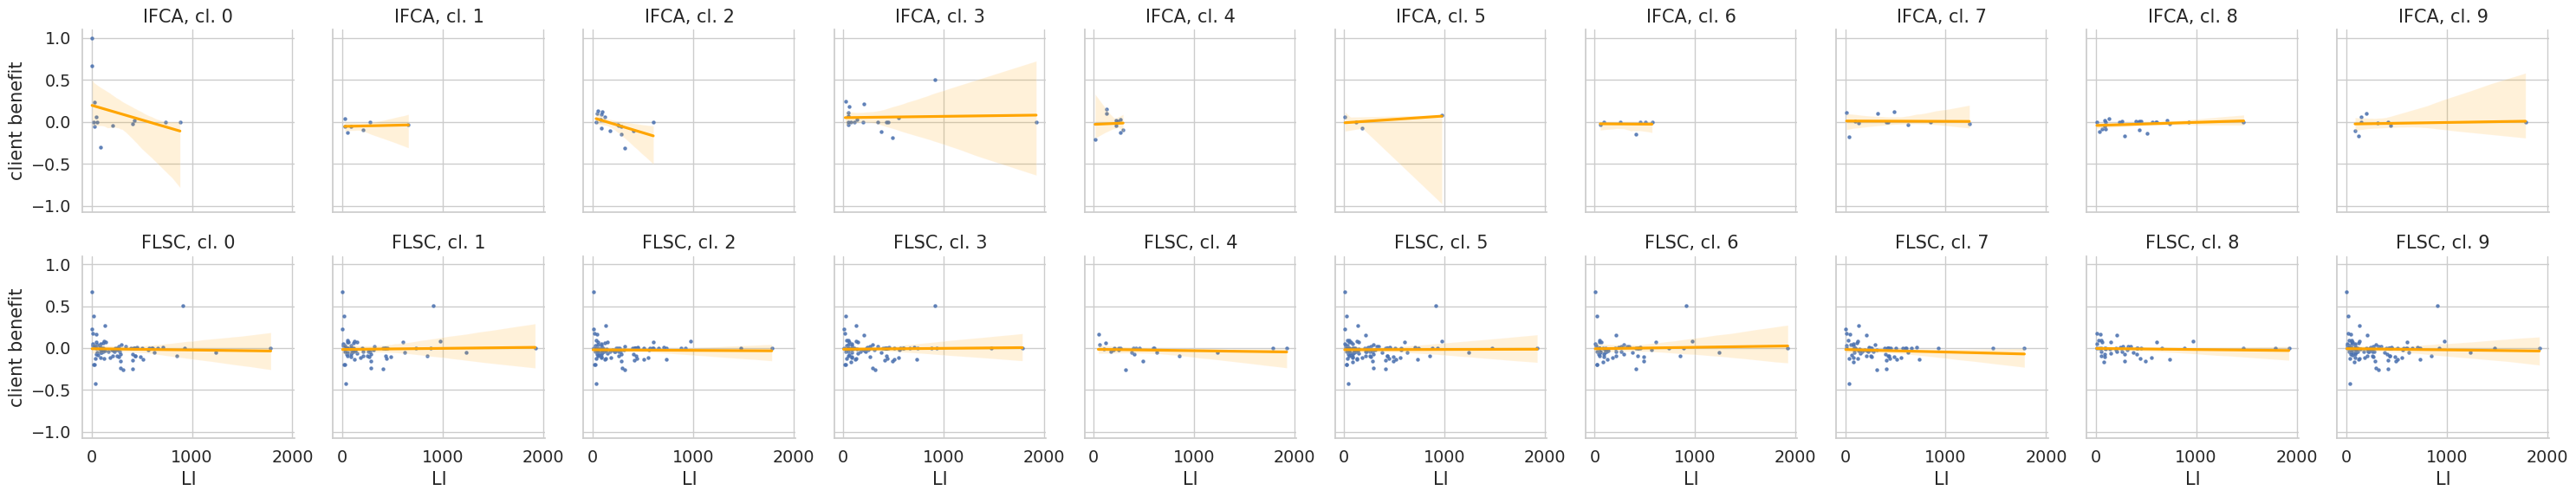

In [65]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10_clusters.png"))

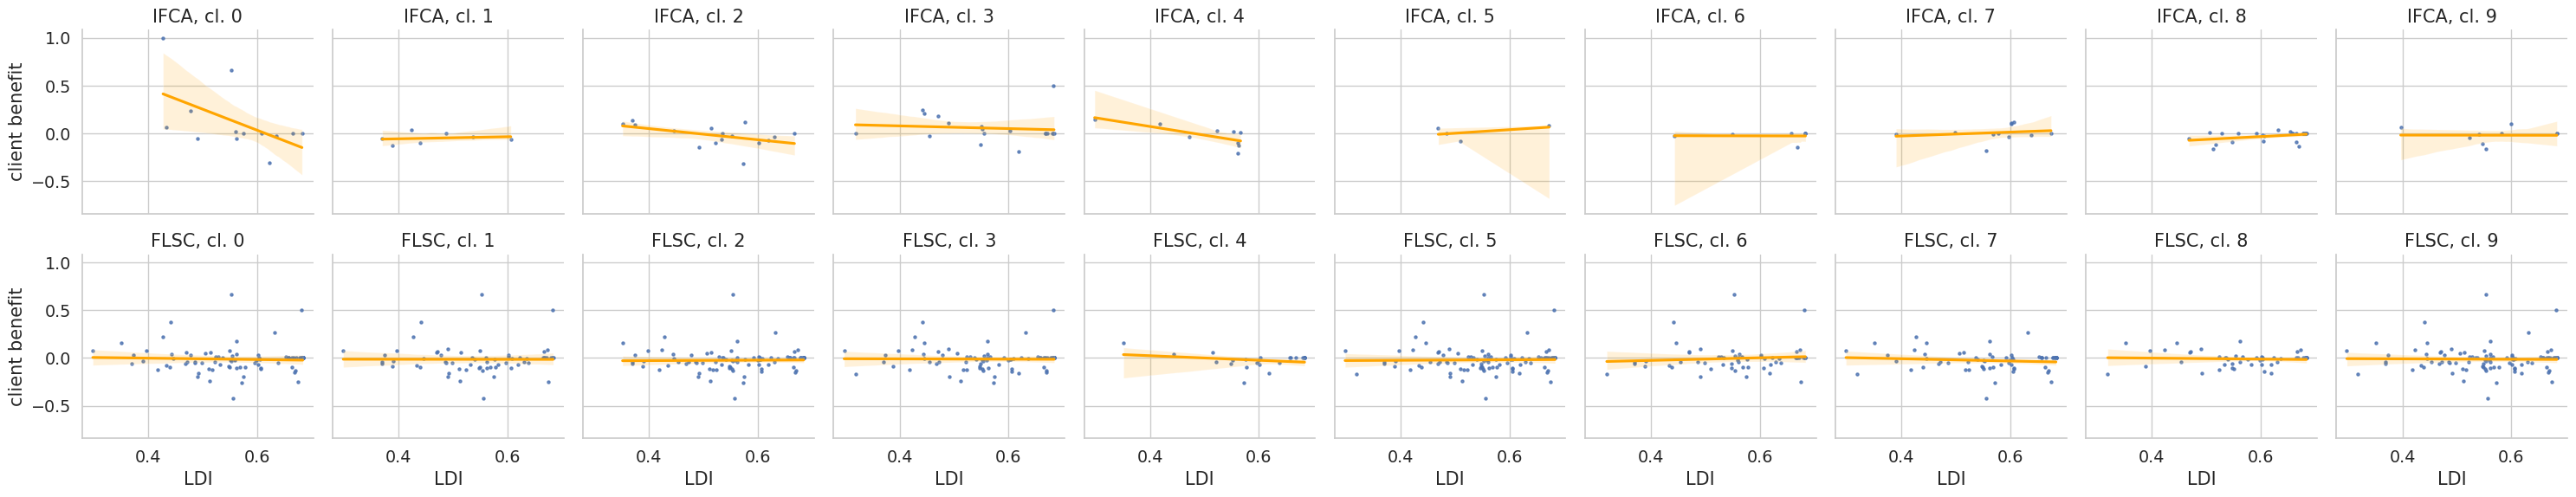

In [66]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters.png"))

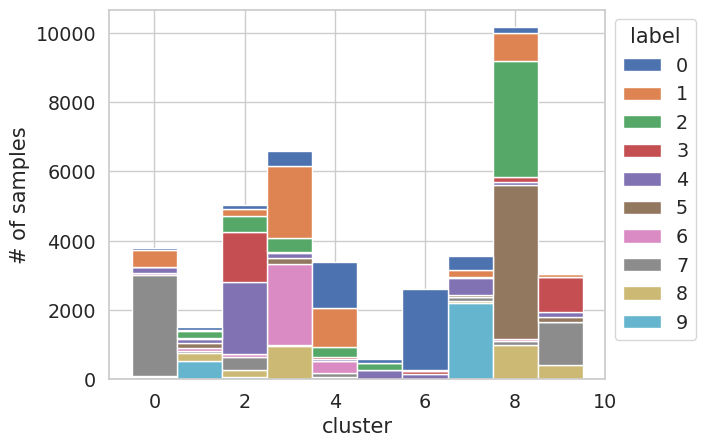

In [67]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters_histogram.png"))

### MNIST

In [68]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [69]:
benefits = compute_client_benefit(conn, data)

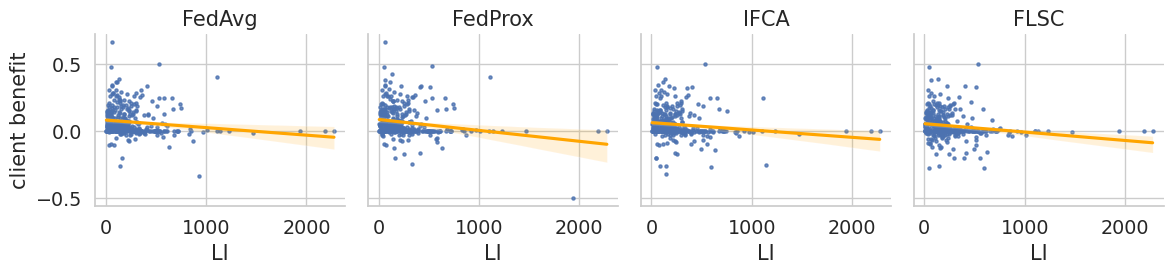

In [70]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist.png"))

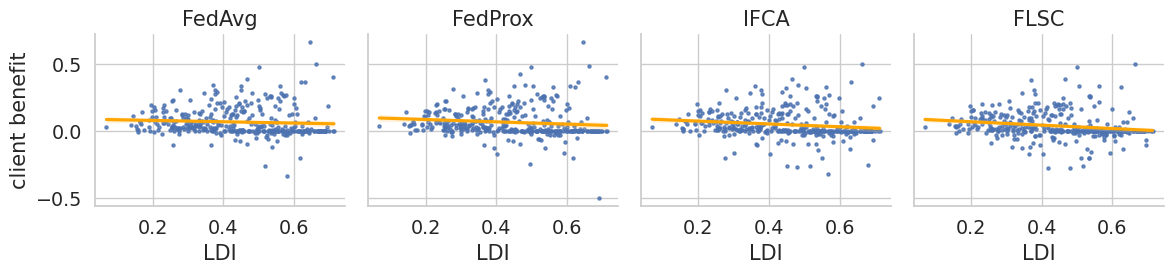

In [71]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist.png"))

In [72]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/label")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0      FLSC   0.039258  3.458678e-12     -0.010981  0.129245  0.003642
1    FedAvg   0.067030  7.325927e-26     -0.015256  0.051235  0.007811
2   FedProx   0.064498  1.233725e-22     -0.017053  0.037048  0.009330
3      IFCA   0.050147  6.949055e-17     -0.005885  0.437540 -0.001104

In [73]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/label")

algorithm  intercept   beta_LI      p_LI  beta_LDI     p_LDI   adj_Rsq
0      FLSC   0.088610 -0.000037  0.099984 -0.085551  0.048193  0.037124
1    FedAvg   0.076525 -0.000063  0.010424  0.021887  0.643023  0.017136
2   FedProx   0.085611 -0.000084  0.001011  0.008526  0.861498  0.036668
3      IFCA   0.089428 -0.000035  0.138113 -0.066058  0.147205  0.022732

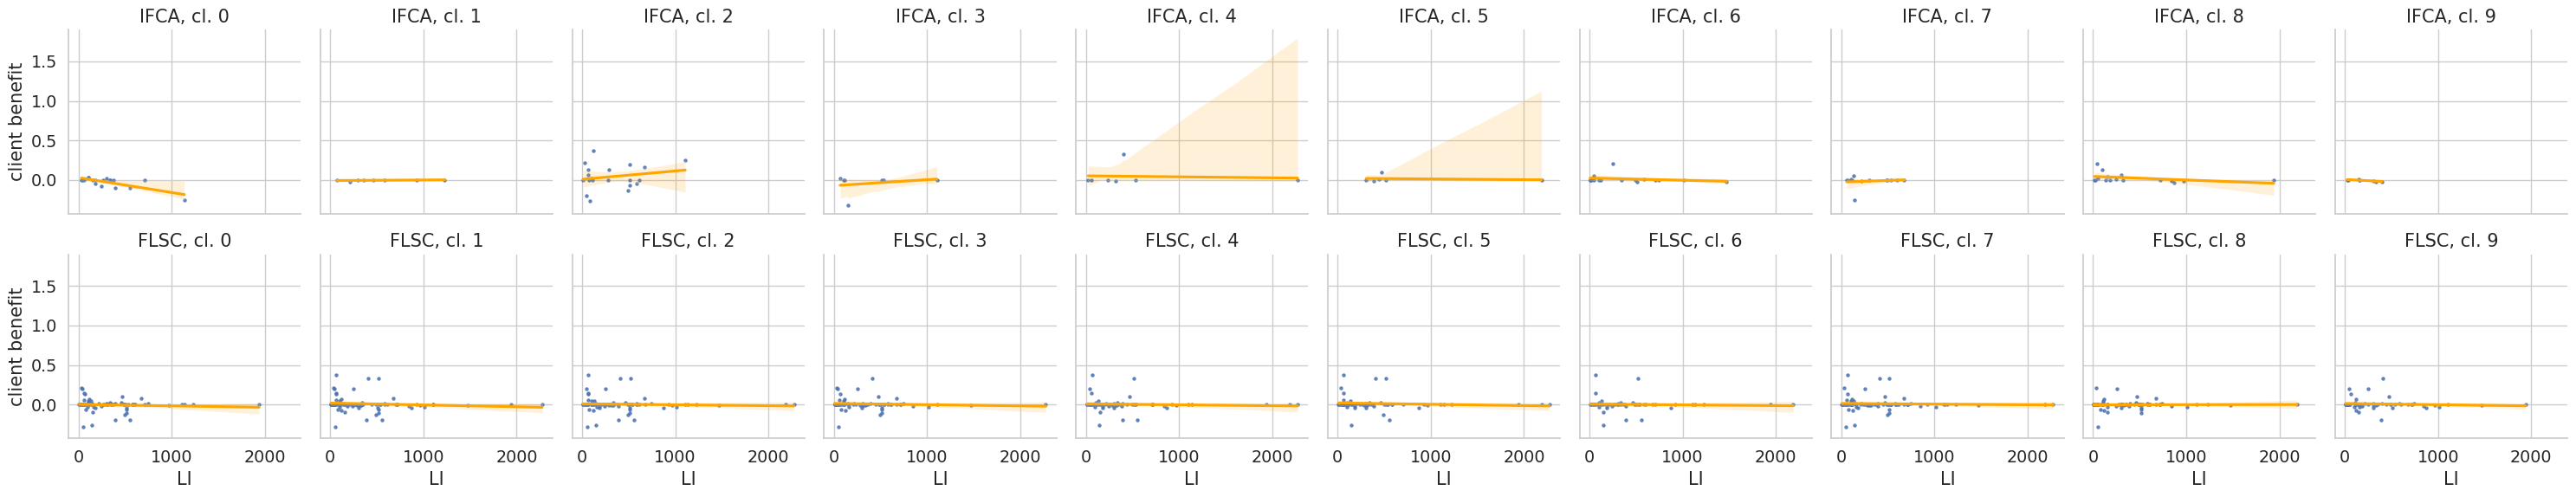

In [74]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist_clusters.png"))

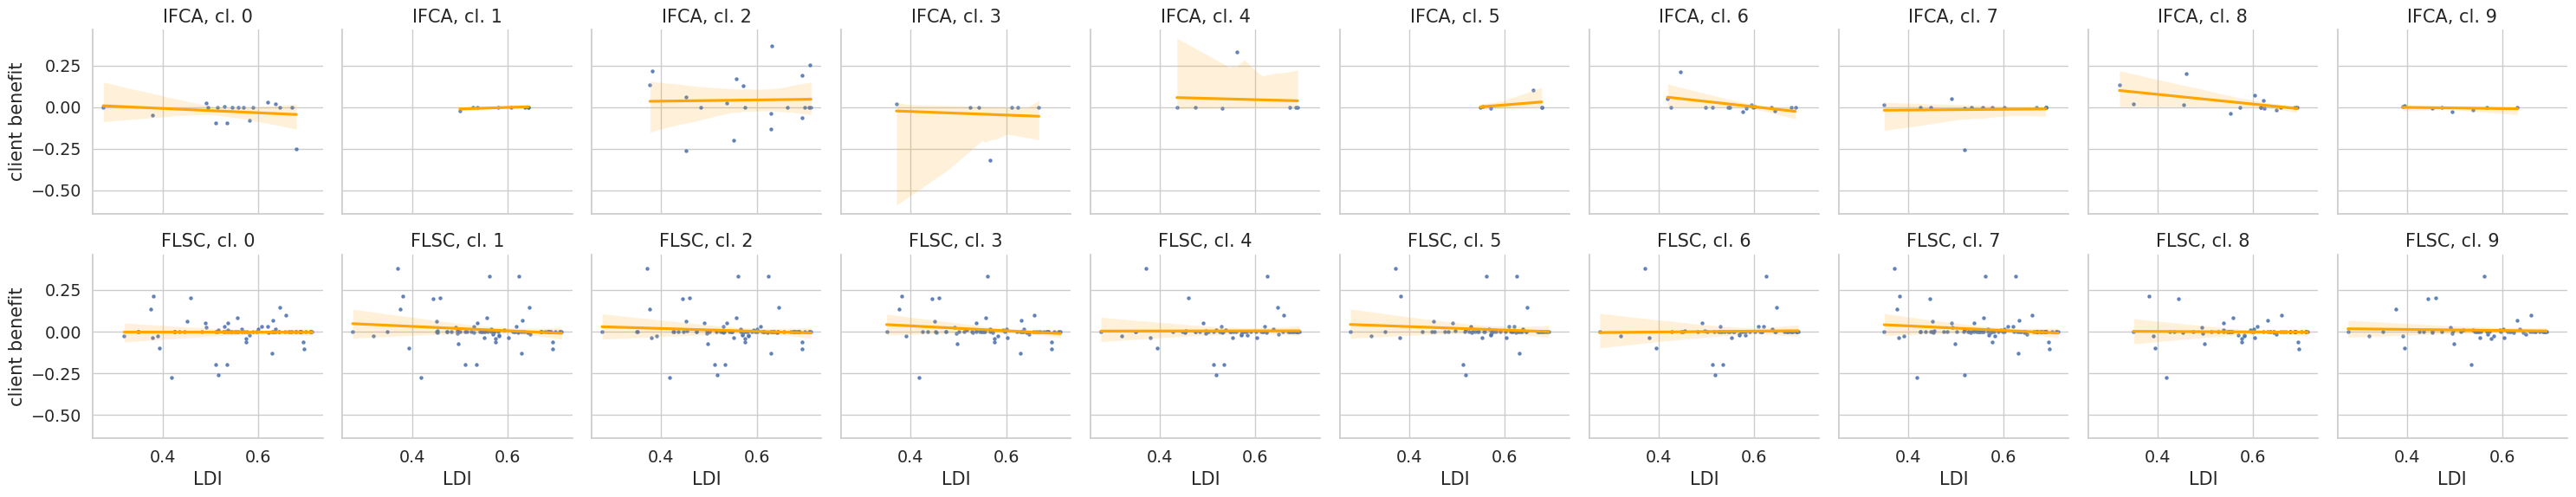

In [75]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters.png"))

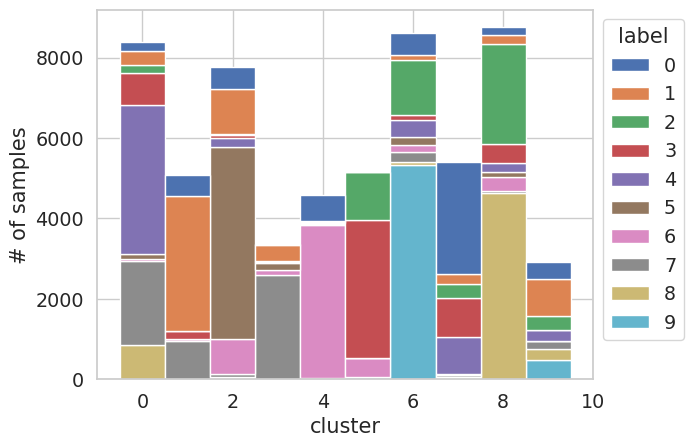

In [76]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters_histogram.png"))

## Feature (Distribution) Imbalance

### CIFAR-10

In [77]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [78]:
benefits = compute_client_benefit(conn, data)

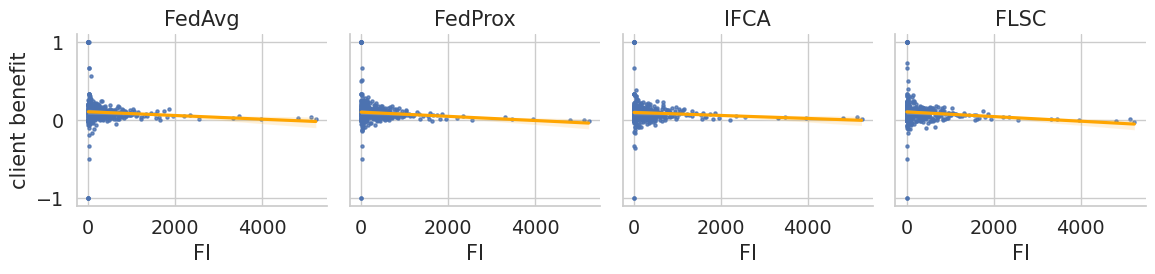

In [79]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10.png"))

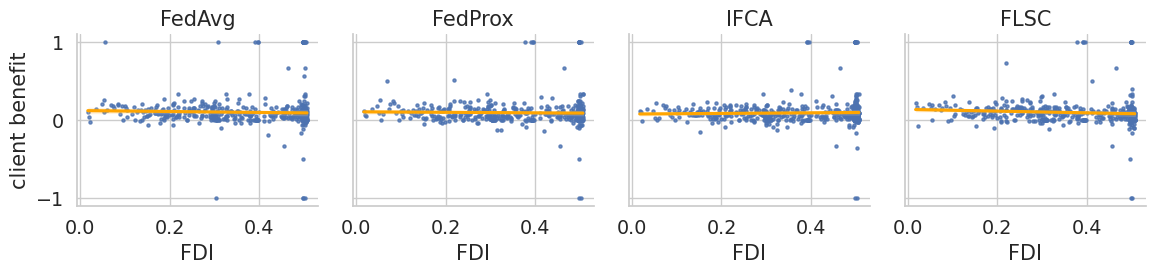

In [80]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10.png"))

In [81]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/feature")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0   FedProx   0.086420  5.950420e-17     -0.009218  0.043508  0.006425
1      IFCA   0.084436  1.456701e-16     -0.009713  0.031808  0.007534
2      FLSC   0.092802  1.859727e-19     -0.004971  0.270657  0.000451
3    FedAvg   0.091718  3.999069e-15     -0.009562  0.065036  0.005026

In [82]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on CIFAR-10/feature")

algorithm  intercept   beta_LI      p_LI  beta_LDI     p_LDI   adj_Rsq
0   FedProx   0.103400 -0.000027  0.072260  0.003314  0.961077  0.003137
1      IFCA   0.075255 -0.000024  0.107223  0.071847  0.286268  0.002045
2      FLSC   0.134154 -0.000025  0.094989 -0.075613  0.258394  0.007703
3    FedAvg   0.120048 -0.000022  0.201087 -0.030058  0.696828  0.000611

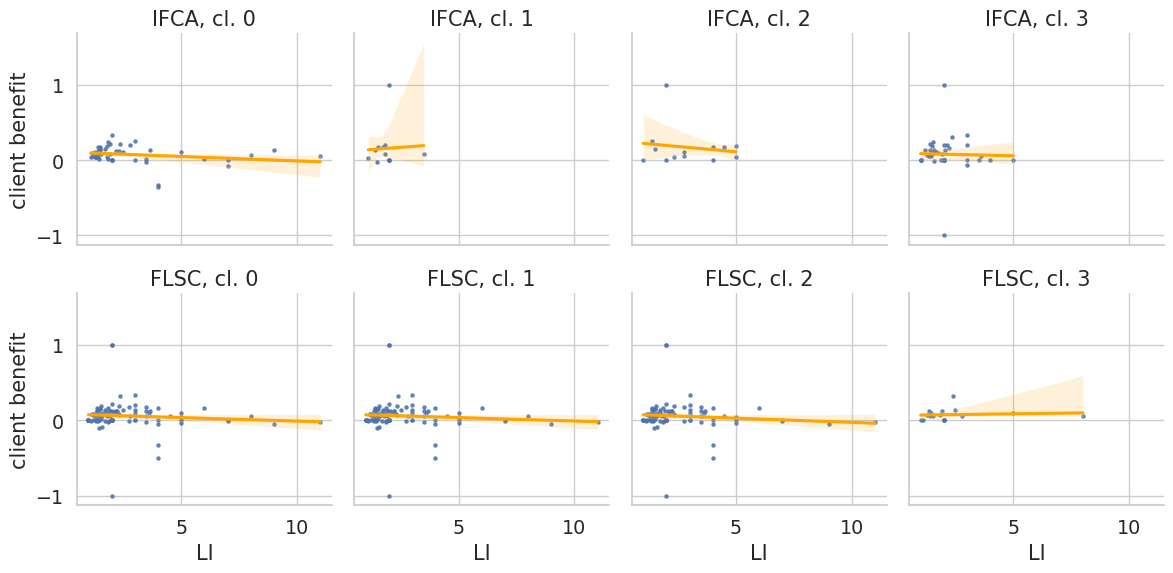

In [83]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10_clusters.png"))

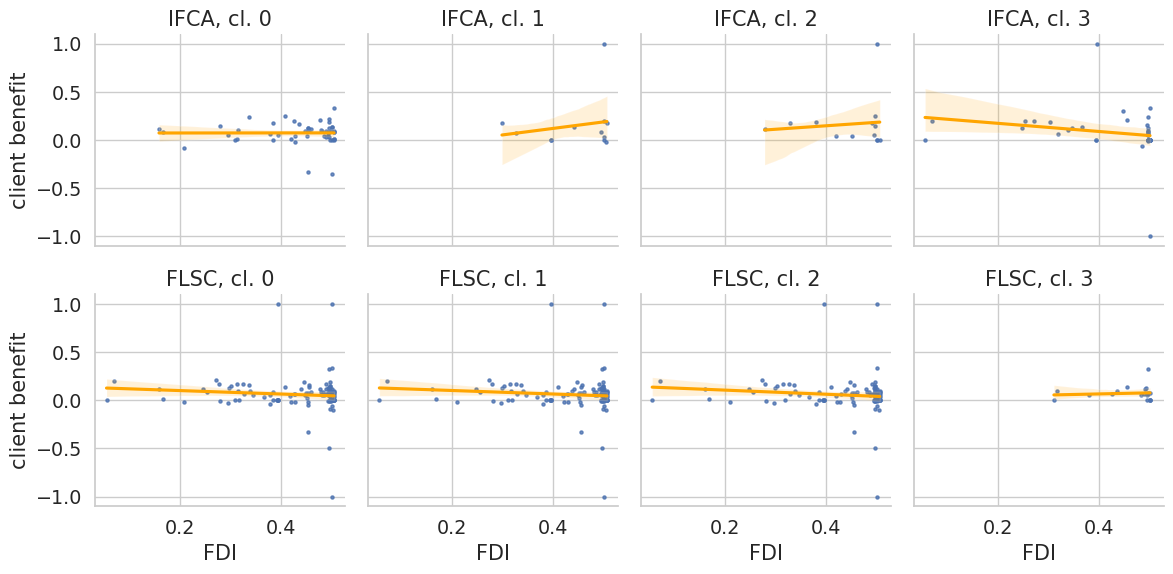

In [84]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters.png"))

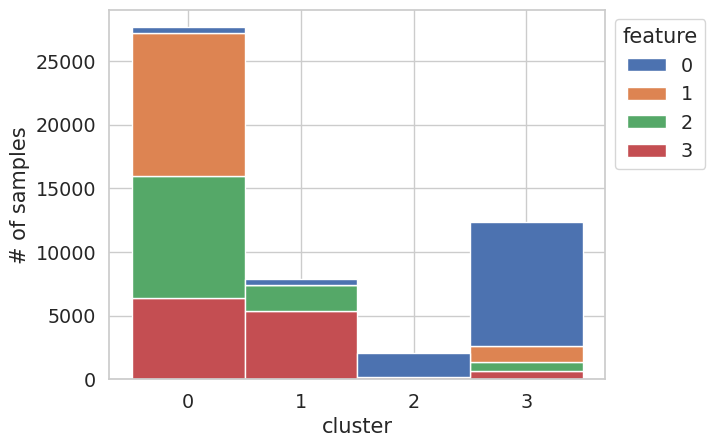

In [85]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="feature").savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters_histogram_features.png"))

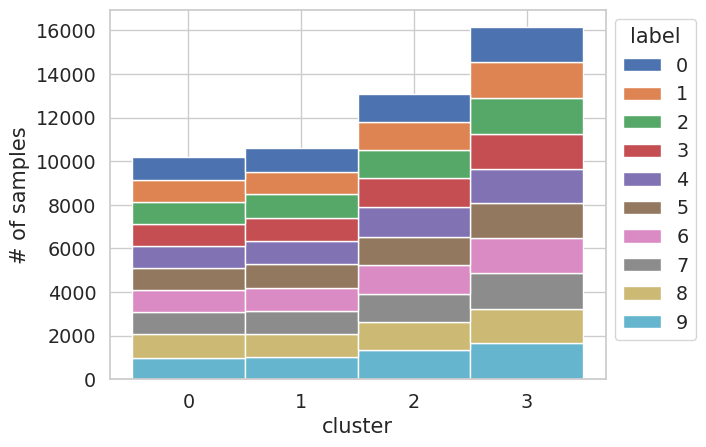

In [86]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters_histogram_labels.png"))

### MNIST

In [87]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [88]:
benefits = compute_client_benefit(conn, data)

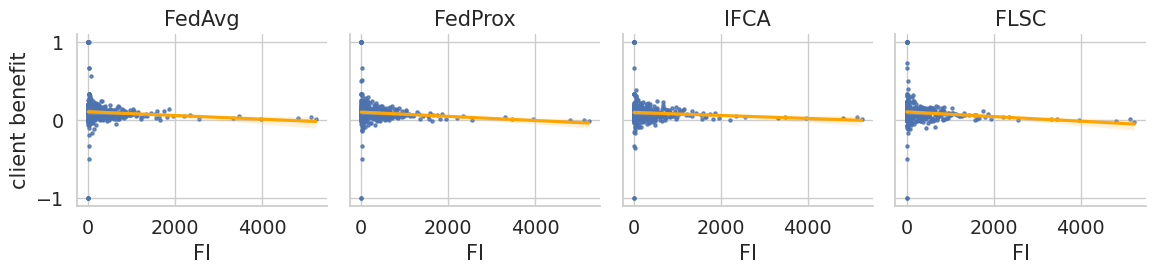

In [89]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist.png"))

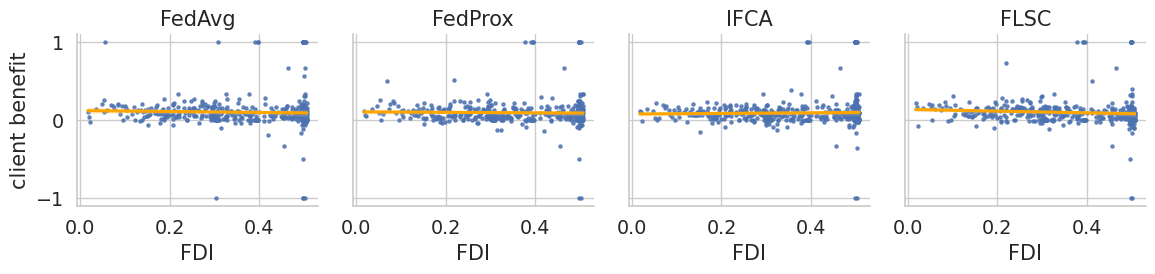

In [90]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

In [91]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/feature")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0   FedProx   0.086420  5.950420e-17     -0.009218  0.043508  0.006425
1      IFCA   0.084436  1.456701e-16     -0.009713  0.031808  0.007534
2      FLSC   0.092802  1.859727e-19     -0.004971  0.270657  0.000451
3    FedAvg   0.091718  3.999069e-15     -0.009562  0.065036  0.005026

In [92]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on MNIST/feature")

algorithm  intercept   beta_LI      p_LI  beta_LDI     p_LDI   adj_Rsq
0   FedProx   0.103400 -0.000027  0.072260  0.003314  0.961077  0.003137
1      IFCA   0.075255 -0.000024  0.107223  0.071847  0.286268  0.002045
2      FLSC   0.134154 -0.000025  0.094989 -0.075613  0.258394  0.007703
3    FedAvg   0.120048 -0.000022  0.201087 -0.030058  0.696828  0.000611

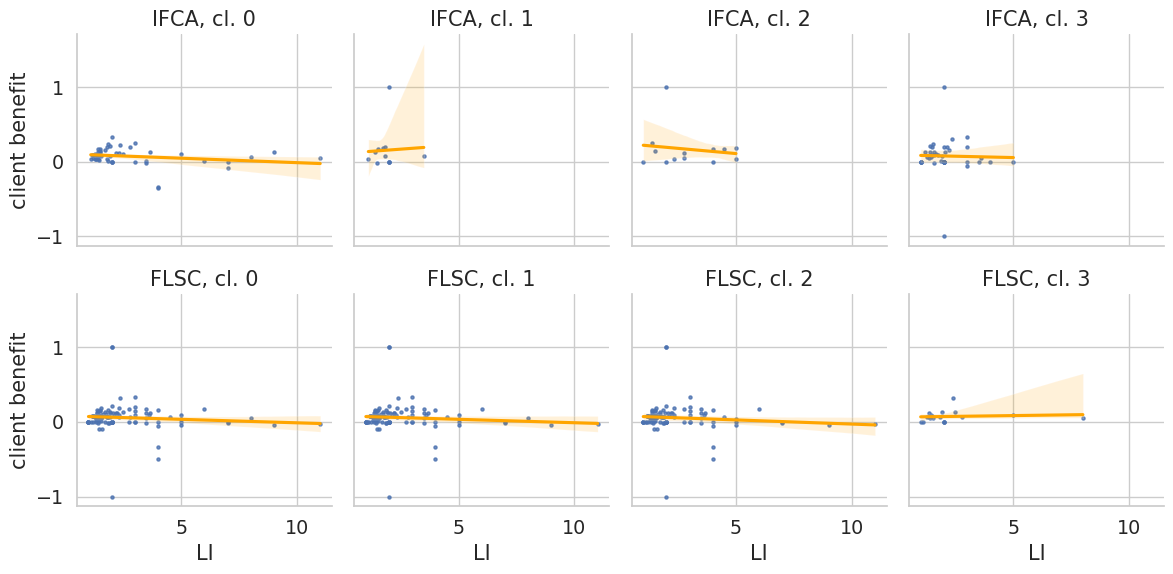

In [93]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance', imbalance_value=0.1).savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist_clusters.png"))

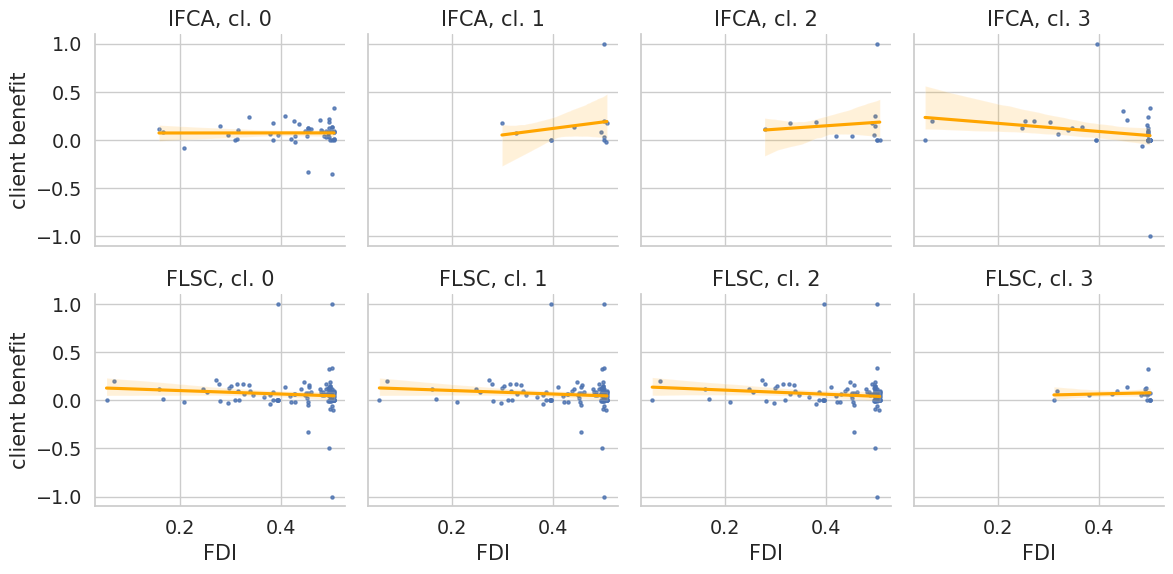

In [94]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance', imbalance_value=0.1).savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters.png"))

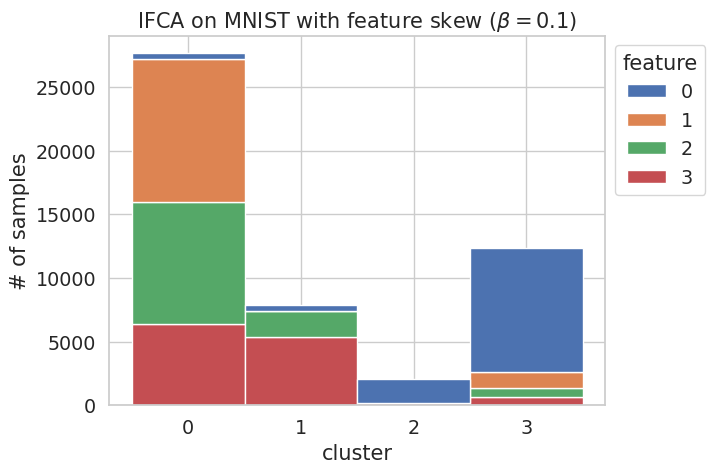

In [95]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="feature", title=r'IFCA on MNIST with feature skew ($\beta=0.1$)')\
    .savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features_ifca_01.png"))

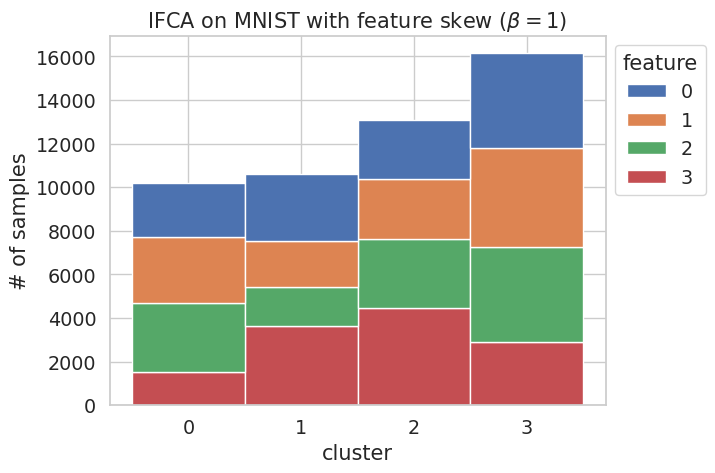

In [96]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="IFCA", by="feature", title=r'IFCA on MNIST with feature skew ($\beta=1$)')\
    .savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features_ifca_1"))

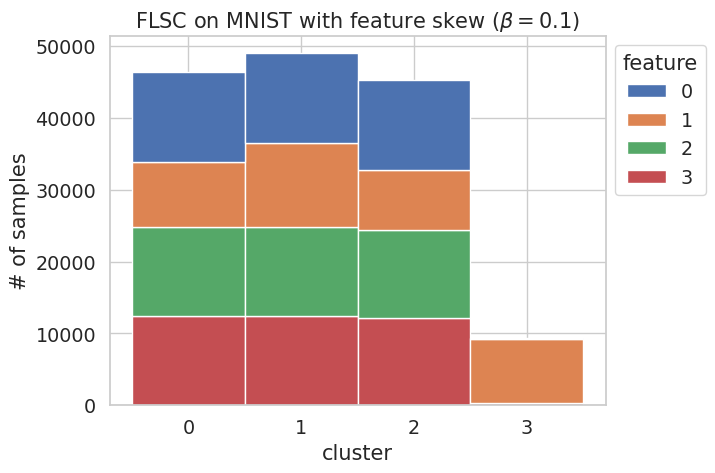

In [97]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="FLSC", by="feature", title=r'FLSC on MNIST with feature skew ($\beta=0.1$)')\
    .savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features_flsc_01.png"))

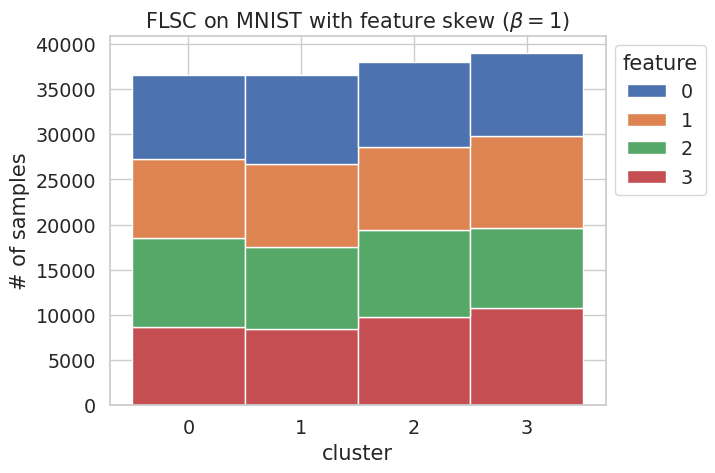

In [98]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="FLSC", by="feature", title=r'FLSC on MNIST with feature skew ($\beta=1$)')\
    .savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features_flsc_1"))

# Client Contribution

## CIFAR-10

In [137]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [138]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

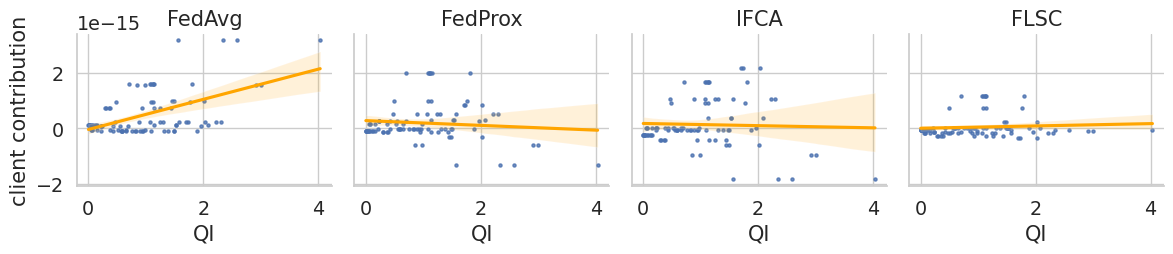

In [139]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_cifar10.png"))

### Feature Imbalance

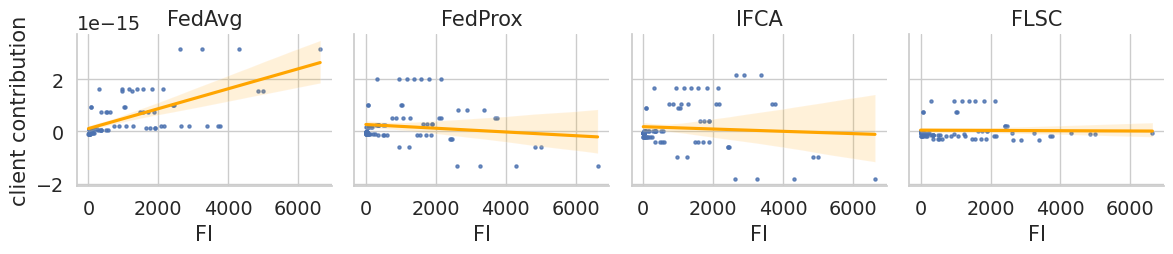

In [140]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_cifar10.png"))

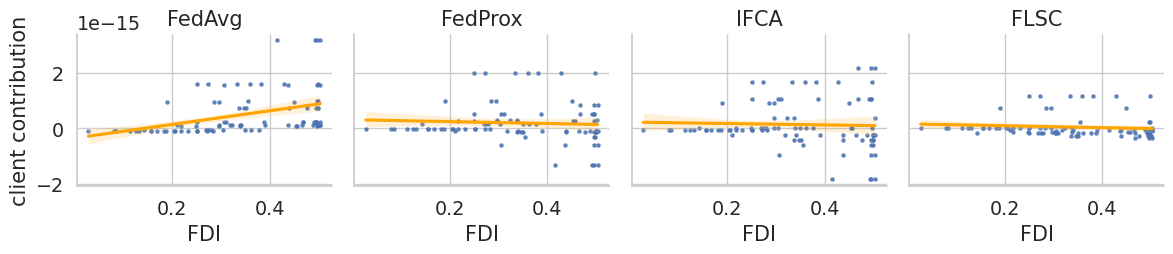

In [141]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_cifar10.png"))

In [142]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on CIFAR-10/feature", number_format="%.3f")

algorithm     intercept  p_intercept       beta_QI          p_QI   adj_Rsq
0   FedProx  2.800525e-16     0.020915 -8.576349e-17  3.631506e-01 -0.001850
1      FLSC  4.488613e-18     0.946300  4.177068e-17  4.271255e-01 -0.004101
2    FedAvg -4.018705e-17     0.730904  5.428714e-16  6.201263e-08  0.276383
3      IFCA  1.774712e-16     0.230300 -3.931007e-17  7.349675e-01 -0.010040

In [143]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on CIFAR-10/feature", number_format="%.3f")

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/client_contribution.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_intercepts.append(res.pvalues[0])
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/client_contribution.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_intercepts.append(res.pvalues[0])
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/client_contribution.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as lab

algorithm     intercept  p_intercept       beta_LI          p_LI  \
0      IFCA  1.864987e-16     0.494049 -4.370902e-20  5.833065e-01   
1   FedProx  2.431319e-16     0.270728 -7.584238e-20  2.401024e-01   
2    FedAvg -2.060351e-17     0.915475  3.592797e-19  9.484030e-09   
3      FLSC  1.782289e-16     0.149502  1.629232e-20  6.504363e-01   

       beta_LDI     p_LDI   adj_Rsq  
0 -9.827102e-18  0.990666 -0.017930  
1  8.420350e-17  0.901240 -0.002778  
2  4.448633e-16  0.458204  0.410513  
3 -4.298677e-16  0.258628 -0.007652

## MNIST

In [144]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [145]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

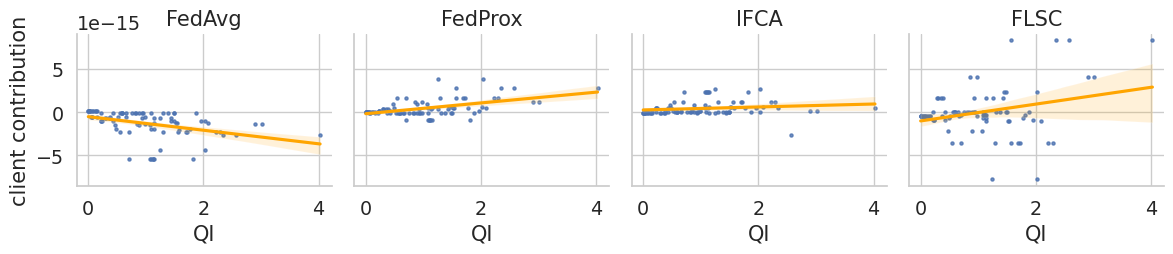

In [146]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_mnist.png"))

### Feature Imbalance

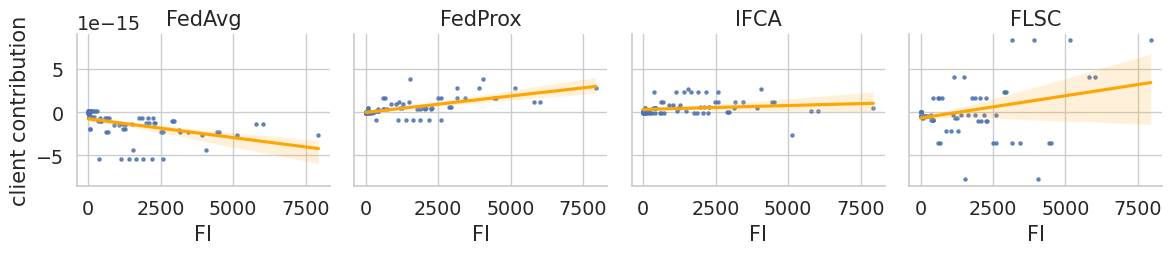

In [147]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_mnist.png"))

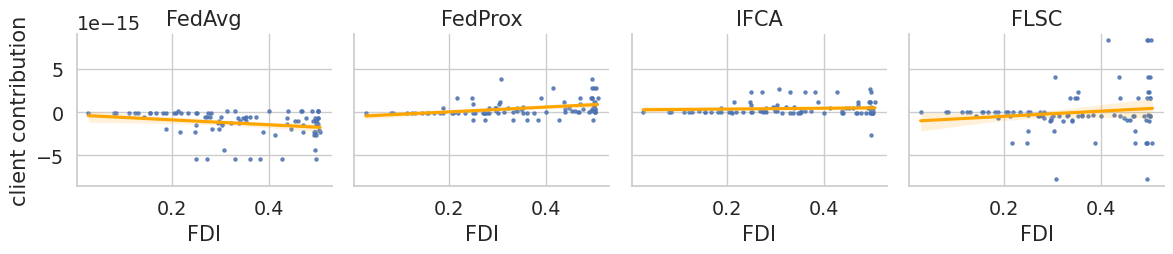

In [148]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_mnist.png"))

In [149]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on MNIST/feature", number_format="%.3f")

algorithm     intercept  p_intercept       beta_QI          p_QI   adj_Rsq
0      FLSC -1.005586e-15     0.025407  9.747465e-16  6.335170e-03  0.071204
1    FedAvg -5.084450e-16     0.040321 -7.868152e-16  9.630289e-05  0.149973
2   FedProx -1.680789e-16     0.245818  6.245039e-16  3.544321e-07  0.247964
3      IFCA  2.716934e-16     0.051808  1.711622e-16  1.185981e-01  0.016401

In [150]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on MNIST/feature", number_format="%.3f")

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/client_contribution.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_intercepts.append(res.pvalues[0])
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/client_contribution.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_intercepts.append(res.pvalues[0])
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/client_contribution.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as lab

algorithm     intercept  p_intercept       beta_LI          p_LI  \
0      FLSC -4.656095e-16     0.567661  5.465098e-19  7.046931e-03   
1      IFCA  3.909834e-16     0.128389  9.819573e-20  1.176720e-01   
2    FedAvg -8.078561e-16     0.069188 -4.418000e-19  8.476280e-05   
3   FedProx -9.861871e-17     0.679423  3.667286e-19  1.081302e-08   

       beta_LDI     p_LDI   adj_Rsq  
0 -6.904820e-16  0.783959  0.079112  
1 -2.000400e-16  0.800181  0.010990  
2  1.646939e-16  0.903770  0.191765  
3  2.988315e-16  0.685627  0.394893